In [1]:
#análise de dados e computação cierntífica
import pandas as pd
import numpy as np

#visualização 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import plotly.express as px

#pré-processamento
from sklearn.preprocessing import PowerTransformer

#estatística
from scipy import stats
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import chi2_contingency


#feature engineering
from sklearn.impute import SimpleImputer 

#pacotes de machine learning em geral
import sklearn
from sklearn.model_selection import train_test_split

#garbage collection
import gc

# Introdução

## Motivação


## Objetivos


# Parâmetros

Definição de alguns parâmetros que serão usados no notebook

In [2]:
#Valor que será usado no random_state para que os resultados sejam reprodutíveis
seed=0

In [3]:
#Estilo que será usado nos gráficos
sns.set_style("darkgrid")

#sklearn vai retornar pandas dataframes
sklearn.set_config(transform_output="pandas")

# Dataset

In [4]:
# O dataset está disponível no seguinte URL:
#https://www.kaggle.com/competitions/porto-seguro-safe-driver-prediction/data

path='/home/rodolfo/Insync/rodolfopcruz2@gmail.com/Google Drive/Estudo/Python_Projects/datasets/porto-seguro-safe-driver-prediction/'
train=pd.read_csv(path+'train.csv')

In [5]:
#Separar uma fração do dataset para validação

y_train=train['target']

x_train, x_val,y_train,y_val, = train_test_split(
    train,y_train, test_size=0.3, random_state=seed,stratify=y_train)

In [6]:
#Proporção de amostras de cada classe nos dados de treino

y_train.value_counts()/len(y_train)

target
0    0.963552
1    0.036448
Name: count, dtype: float64

In [7]:
#Proporção de amostras de cada classe nos dados de validação

y_val.value_counts()/len(y_val)

target
0    0.963554
1    0.036446
Name: count, dtype: float64

In [8]:
# Salvar os datasets
x_train.to_csv(path+'x_train.csv', index=False)
y_train.to_csv(path+'y_train.csv', index=False)
x_val.to_csv(path+'x_val.csv', index=False)
y_val.to_csv(path+'y_val.csv', index=False)

In [9]:
del train
gc.collect()


0

# Análise Inicial


Nos conjuntos de dados de treino e teste, as "features" que pertencem ao mesmo grupo estão com uma identificação em seus nomes (e.g., ind, reg, car, calc). Além disso, alguma features tem o sufixo bin ou cat em seus nomes, para indicar que são variáveis binárias e categóricas respectivamente. Já as features que não contêm um desses dois sufixos são ou contínuas ou ordinárias. Quando o valor de -1 foi usado para alguma feature isso indica que ela estava ausente (missing value). Por fim a coluna "target" indica se foi aberta ou não por um motorista a solicitação do seguro.




Identificações usadas para separar as "features pertencentes aos 4 grupos":

 -ind
 
 -reg
 
 -car 
 
 -calc


In [10]:
x_train.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,4.166480e+05,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,...,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000
mean,7.435335e+05,0.036448,1.902390,1.357784,4.426463,0.417314,0.406170,0.393373,0.257330,0.164383,...,5.445597,1.441985,2.870442,7.538011,0.122302,0.628108,0.554554,0.286496,0.348995,0.153535
std,4.293728e+05,0.187402,1.985387,0.664223,2.697667,0.493428,1.352777,0.488499,0.437163,0.370624,...,2.332877,1.203898,1.692596,2.744240,0.327635,0.483310,0.497015,0.452124,0.476653,0.360503
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.717405e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.437025e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115086e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488021e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 416648 entries, 378330 to 232792
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              416648 non-null  int64  
 1   target          416648 non-null  int64  
 2   ps_ind_01       416648 non-null  int64  
 3   ps_ind_02_cat   416648 non-null  int64  
 4   ps_ind_03       416648 non-null  int64  
 5   ps_ind_04_cat   416648 non-null  int64  
 6   ps_ind_05_cat   416648 non-null  int64  
 7   ps_ind_06_bin   416648 non-null  int64  
 8   ps_ind_07_bin   416648 non-null  int64  
 9   ps_ind_08_bin   416648 non-null  int64  
 10  ps_ind_09_bin   416648 non-null  int64  
 11  ps_ind_10_bin   416648 non-null  int64  
 12  ps_ind_11_bin   416648 non-null  int64  
 13  ps_ind_12_bin   416648 non-null  int64  
 14  ps_ind_13_bin   416648 non-null  int64  
 15  ps_ind_14       416648 non-null  int64  
 16  ps_ind_15       416648 non-null  int64  
 17  ps_ind_16_

In [12]:
#coluna id é somente um identificador e pode ser removida
x_train=x_train.drop(columns='id')


In [13]:
#Listas com variáveis binárias, categóricas e numéricas

cat_var     =[var for var in x_train.columns if 'cat' in var]
bin_var     =[var for var in x_train.columns if 'bin' in var]
num_var =[var for var in x_train.columns if 'cat' not in var and 'bin' not in var and var!='target']

# Target

- A coluna target é a resposta que deverá ser produzida pelos modelos de inteligência artificial
  - 0 - cliente não solicitou seguro
  - 1 - cliente solicitou seguro

In [14]:
#O dataset é desbalanceado
x_train['target'].value_counts()

target
0    401462
1     15186
Name: count, dtype: int64

In [15]:
#3.64% dos motoristam reinvidicaram o seguro 
x_train['target'].value_counts()/x_train.target.size

target
0    0.963552
1    0.036448
Name: count, dtype: float64

# Missing Values

In [16]:
#"Features" com valores -1 indicam que estavam ausentes (o real valor da 'features não é conhecido')"
#Substituindo -1 por np.nan para facilitar identificação

x_train.replace(-1,np.nan,inplace=True)

In [17]:
#Valores ausentes (missing values)

(x_train.isna()).sum()

target                 0
ps_ind_01              0
ps_ind_02_cat        152
ps_ind_03              0
ps_ind_04_cat         64
ps_ind_05_cat       4099
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03          75484
ps_car_01_cat         79
ps_car_02_cat          4
ps_car_03_cat     287859
ps_car_04_cat          0
ps_car_05_cat     186387
ps_car_06_cat          0
ps_car_07_cat       8092
ps_car_08_cat          0
ps_car_09_cat        393
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              4
ps_car_12              1
ps_car_13              0
ps_car_14          29946
ps_car_15              0
ps_calc_01             0
ps_calc_02             0


In [18]:
#Proporção de missing values nas features categóricas

cat_var_with_na=[var for var in cat_var if x_train[var].isna().sum()!=0] #lista de variáveis categóricas com valores ausentes
(x_train[cat_var].isna()).sum()/len(x_train)

ps_ind_02_cat    0.000365
ps_ind_04_cat    0.000154
ps_ind_05_cat    0.009838
ps_car_01_cat    0.000190
ps_car_02_cat    0.000010
ps_car_03_cat    0.690893
ps_car_04_cat    0.000000
ps_car_05_cat    0.447349
ps_car_06_cat    0.000000
ps_car_07_cat    0.019422
ps_car_08_cat    0.000000
ps_car_09_cat    0.000943
ps_car_10_cat    0.000000
ps_car_11_cat    0.000000
dtype: float64

In [ ]:
#Proporção de missing values nas features binárias
bin_var_with_na=[var for var in bin_var if x_train[var].isna().sum()!=0] #lista de variáveis binárias com valores ausentes
(x_train[bin_var].isna()).sum()/len(x_train)

ps_ind_06_bin     0.0
ps_ind_07_bin     0.0
ps_ind_08_bin     0.0
ps_ind_09_bin     0.0
ps_ind_10_bin     0.0
ps_ind_11_bin     0.0
ps_ind_12_bin     0.0
ps_ind_13_bin     0.0
ps_ind_16_bin     0.0
ps_ind_17_bin     0.0
ps_ind_18_bin     0.0
ps_calc_15_bin    0.0
ps_calc_16_bin    0.0
ps_calc_17_bin    0.0
ps_calc_18_bin    0.0
ps_calc_19_bin    0.0
ps_calc_20_bin    0.0
dtype: float64

In [ ]:
#Proporção de missing values nas features numéricas
num_var_with_na=[var for var in num_var if x_train[var].isna().sum()!=0] #lista de variáveis numéricas com valores ausentes
(x_train[num_var].isna()).sum()/len(x_train)

ps_ind_01     0.000000
ps_ind_03     0.000000
ps_ind_14     0.000000
ps_ind_15     0.000000
ps_reg_01     0.000000
ps_reg_02     0.000000
ps_reg_03     0.181170
ps_car_11     0.000010
ps_car_12     0.000002
ps_car_13     0.000000
ps_car_14     0.071874
ps_car_15     0.000000
ps_calc_01    0.000000
ps_calc_02    0.000000
ps_calc_03    0.000000
ps_calc_04    0.000000
ps_calc_05    0.000000
ps_calc_06    0.000000
ps_calc_07    0.000000
ps_calc_08    0.000000
ps_calc_09    0.000000
ps_calc_10    0.000000
ps_calc_11    0.000000
ps_calc_12    0.000000
ps_calc_13    0.000000
ps_calc_14    0.000000
dtype: float64

## Relação entre missing values e target

Verificar a influência de dados ausentes no target value.

Considerando um feature qualquer, o target value será agupado considerando a presença de missing values na feature. Será então calculada a média do target  quando os dados da feature estão ausentes e quando estão presente para verificar se há diferença entre as duas médias.

In [21]:
def plot_relacao_missing_target(dados, column_name , y='target',label_y='Média do target'):
    
    '''
    Função para identificar se a ocorrência de missing values para um determinada feature tem influência no target. Para isso a média do target será calculada para os dados separados em dois 
    grupos: um com dados ausentes para a feature e outro com dados disponíveis para a feature. A média dos dados para os dois grupos será então plotada em uma gráfico de barras
    
    
    Inputs
        dados        - Pandas dataframes com os dados
        column_name  - (str) Coluna com os missing values. Essa coluna será usada para dividir os dados em dois grupos
        y            - (str) Nome da coluna com os target values
        label_y      - (str) Label para o eixo y do gráfico
    
    '''

    

    x=dados.copy()
    x['missing_or_not']=np.where(x[column_name].isna(),'missing value','value available')
    x=x.groupby('missing_or_not')[y].mean()
    plt.figure()
    plt.xlabel(column_name)
    plt.ylabel(label_y)
    sns.barplot(x)


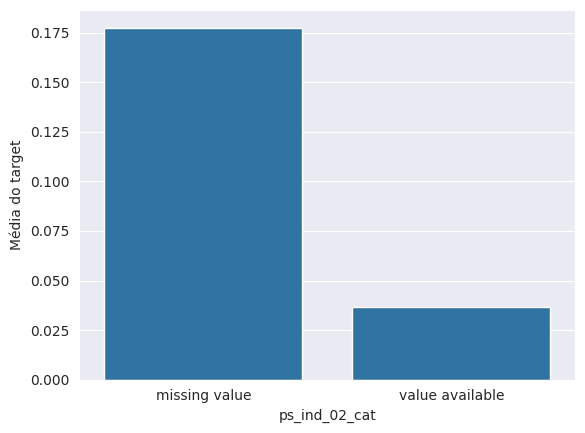

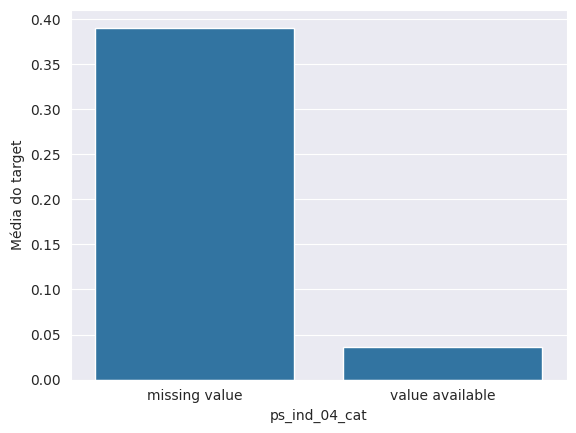

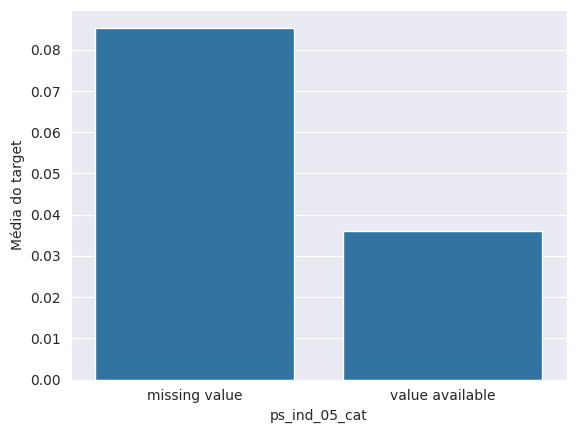

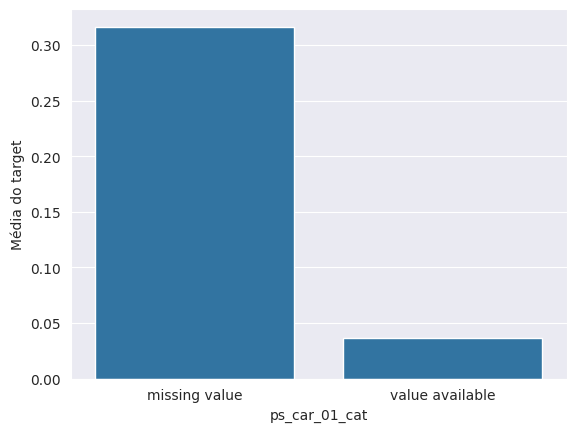

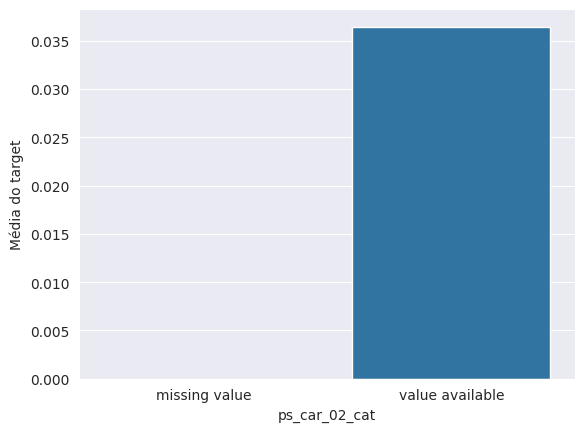

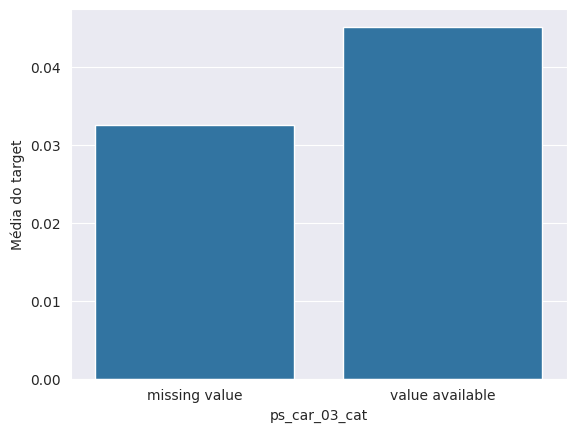

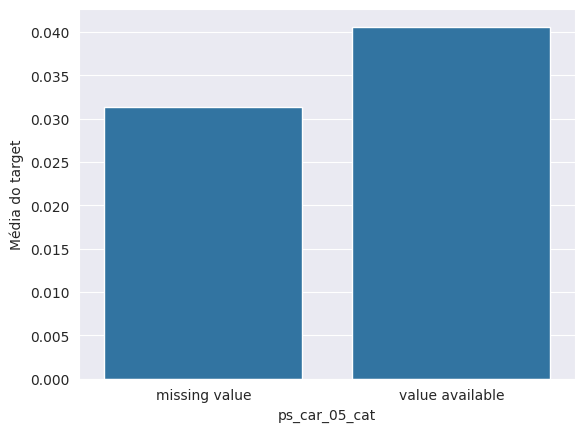

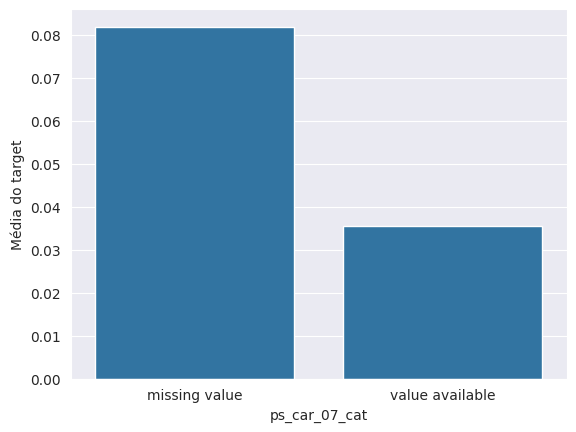

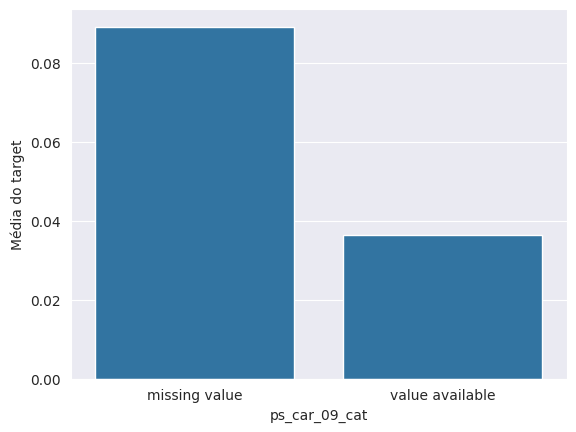

In [22]:
#Plotar gráficos das variáveis categóricas

for var in cat_var_with_na:
    plot_relacao_missing_target(x_train,var)

In [23]:
#Plotar gráfico das variáveis binárias
#nenhuma variável binária tem missing values
for var in bin_var_with_na:
    plot_relacao_missing_target(x_train,var)

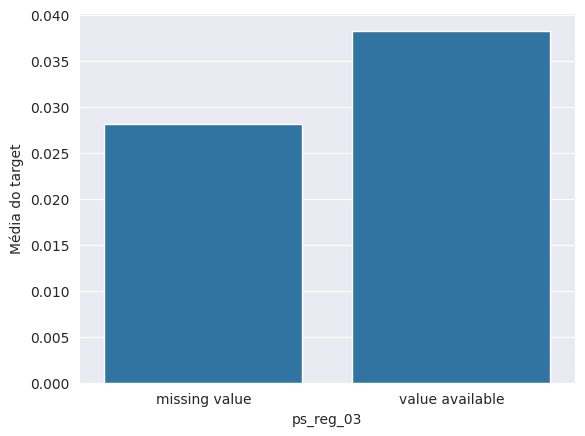

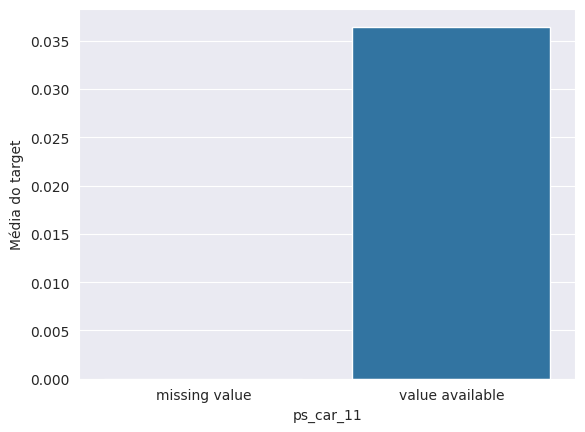

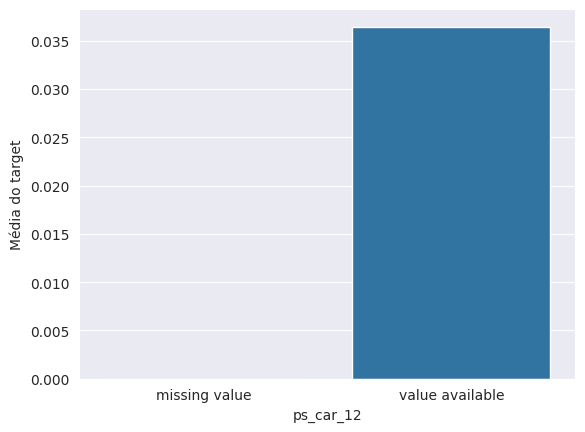

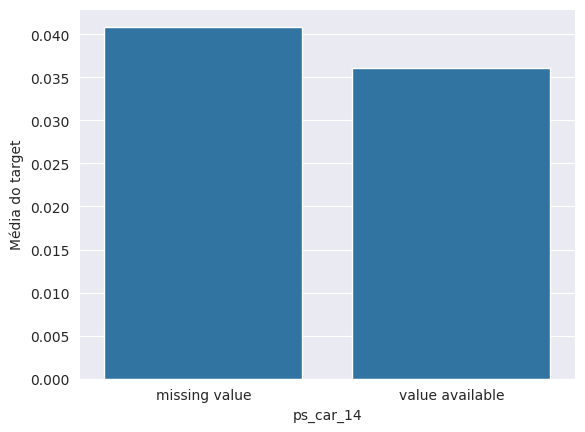

In [24]:
#Plotar gráfico das variáveis numéricas
#nenhuma variável binária tem missing values
for var in num_var_with_na:
    plot_relacao_missing_target(x_train,var)

A média dos target values e diferente para os missing values de algumas das features, o que indica que os missing values podem conter informações importantes.

# Variáveis Numéricas

In [25]:
#Agumas são contínuas e outras são discretas
# A maior parte delas são discretas

x_train[num_var].nunique()

ps_ind_01         8
ps_ind_03        12
ps_ind_14         5
ps_ind_15        14
ps_reg_01        10
ps_reg_02        19
ps_reg_03      4962
ps_car_11         4
ps_car_12       174
ps_car_13     60479
ps_car_14       832
ps_car_15        15
ps_calc_01       10
ps_calc_02       10
ps_calc_03       10
ps_calc_04        6
ps_calc_05        7
ps_calc_06       11
ps_calc_07       10
ps_calc_08       11
ps_calc_09        8
ps_calc_10       25
ps_calc_11       20
ps_calc_12       11
ps_calc_13       14
ps_calc_14       24
dtype: int64

In [26]:
#Features com menos de 30 categorias serão consideradas discretas e as com mais de 30 categorias continuas

threshold_numero_categorias=30

num_var_continuas=[var for var in num_var if x_train[var].nunique()>30]
num_var_discretas=[var for var in num_var if x_train[var].nunique()<=30]


In [27]:
num_var_continuas

['ps_reg_03', 'ps_car_12', 'ps_car_13', 'ps_car_14']

array([[<Axes: title={'center': 'ps_reg_03'}>,
        <Axes: title={'center': 'ps_car_12'}>],
       [<Axes: title={'center': 'ps_car_13'}>,
        <Axes: title={'center': 'ps_car_14'}>]], dtype=object)

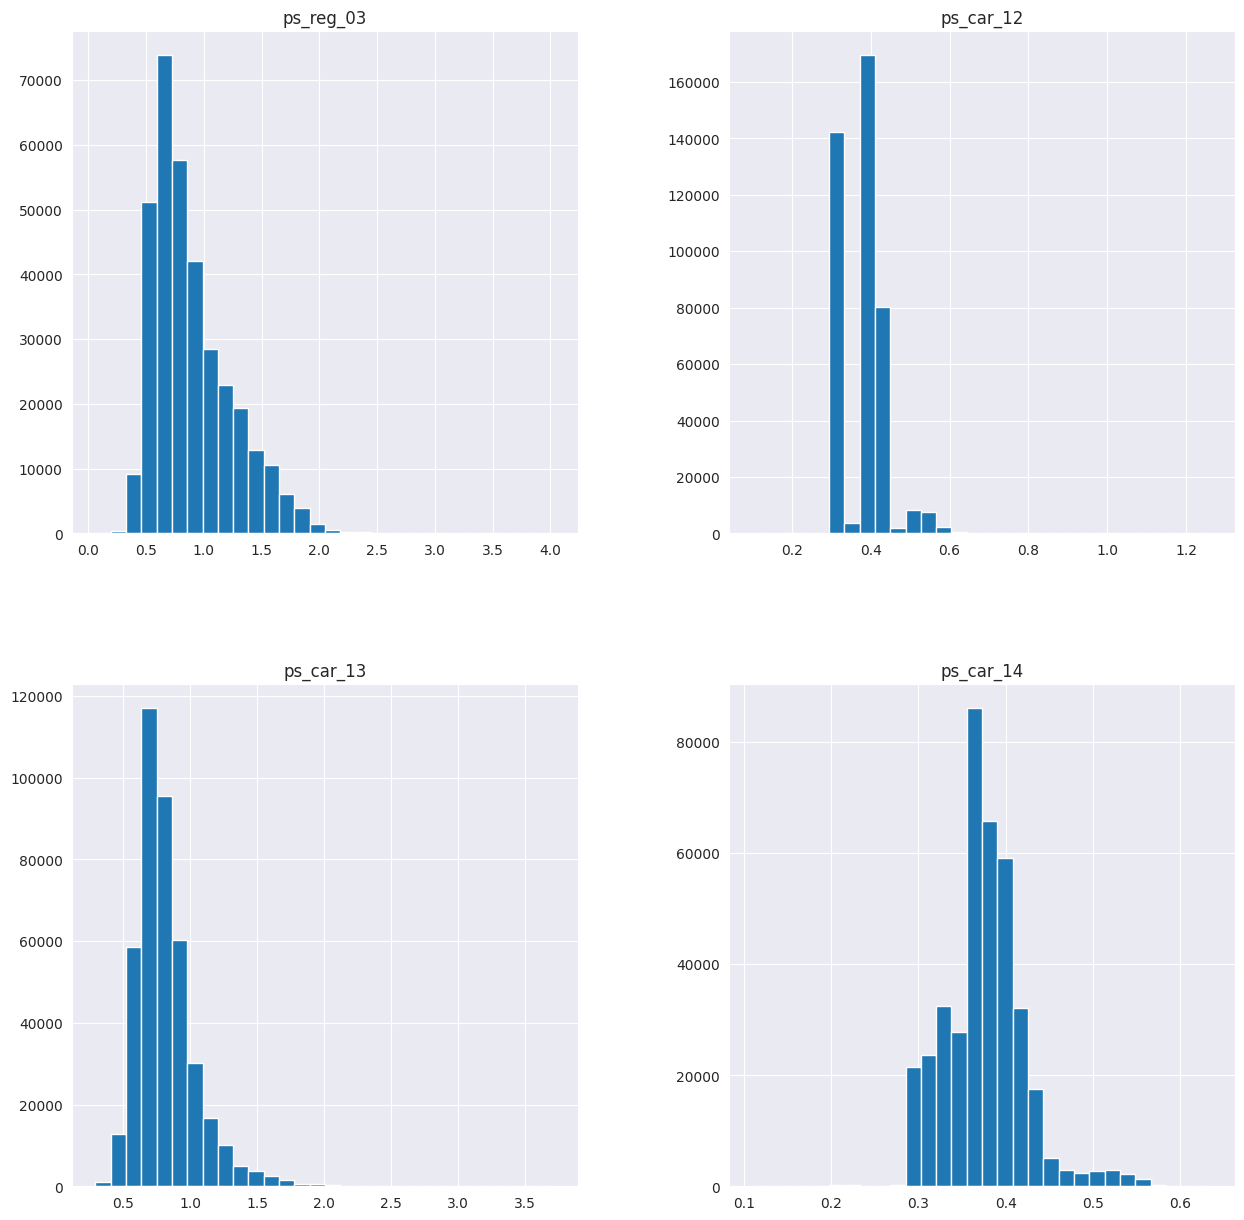

In [28]:
#plotar a distribuição das features numéricas contínuas
x_train[num_var_continuas].hist(bins=30,figsize=(15,15))

array([[<Axes: title={'center': 'ps_ind_01'}>,
        <Axes: title={'center': 'ps_ind_03'}>,
        <Axes: title={'center': 'ps_ind_14'}>,
        <Axes: title={'center': 'ps_ind_15'}>,
        <Axes: title={'center': 'ps_reg_01'}>],
       [<Axes: title={'center': 'ps_reg_02'}>,
        <Axes: title={'center': 'ps_car_11'}>,
        <Axes: title={'center': 'ps_car_15'}>,
        <Axes: title={'center': 'ps_calc_01'}>,
        <Axes: title={'center': 'ps_calc_02'}>],
       [<Axes: title={'center': 'ps_calc_03'}>,
        <Axes: title={'center': 'ps_calc_04'}>,
        <Axes: title={'center': 'ps_calc_05'}>,
        <Axes: title={'center': 'ps_calc_06'}>,
        <Axes: title={'center': 'ps_calc_07'}>],
       [<Axes: title={'center': 'ps_calc_08'}>,
        <Axes: title={'center': 'ps_calc_09'}>,
        <Axes: title={'center': 'ps_calc_10'}>,
        <Axes: title={'center': 'ps_calc_11'}>,
        <Axes: title={'center': 'ps_calc_12'}>],
       [<Axes: title={'center': 'ps_calc_13'

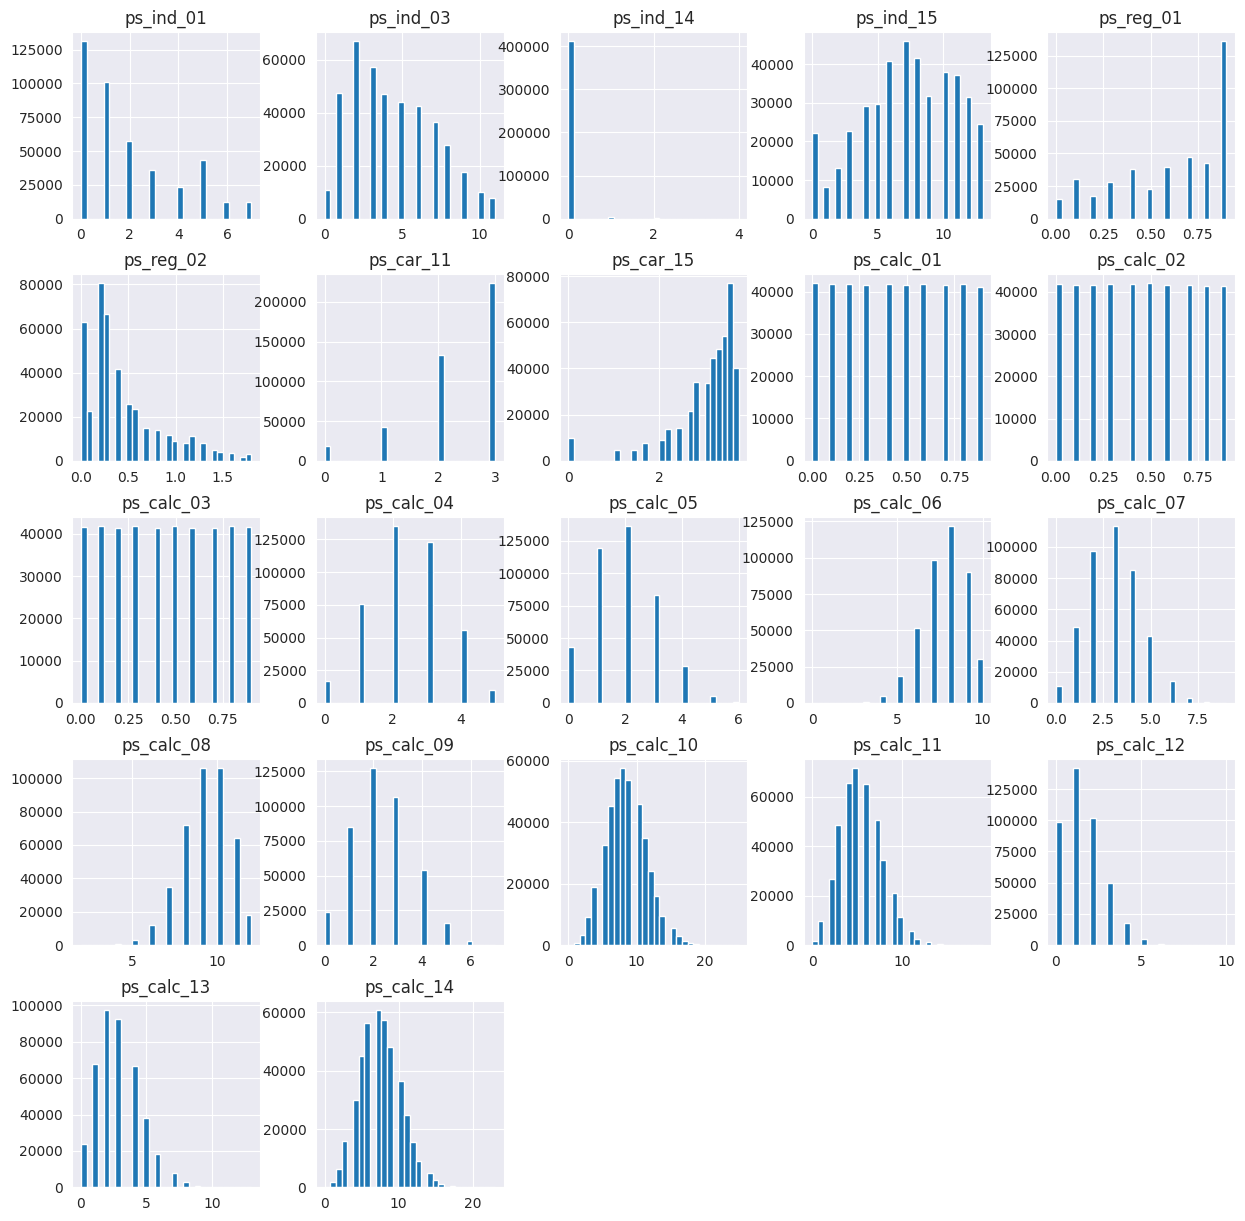

In [29]:
#plotar a distribuição das features numéricas discretas
x_train[num_var_discretas].hist(bins=30,figsize=(15,15))

## Variáveis Numéricas Contínuas

### Missing Values

In [ ]:
#Número de missing values
x_train[num_var_continuas].isna().sum()

ps_reg_03    75484
ps_car_12        1
ps_car_13        0
ps_car_14    29946
dtype: int64

In [31]:
#Proporção de missing values
(x_train[num_var_continuas].isna().sum())/len(x_train)

ps_reg_03    0.181170
ps_car_12    0.000002
ps_car_13    0.000000
ps_car_14    0.071874
dtype: float64

In [32]:
#Substituir missing values 
train_num_var_cont=x_train[num_var_continuas].copy()
imputer=imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
train_num_var_cont=imputer.fit_transform(train_num_var_cont)


In [33]:
#Nenhum missing value
train_num_var_cont.isna().sum()

ps_reg_03    0
ps_car_12    0
ps_car_13    0
ps_car_14    0
dtype: int64

### Tranformações

Aplicação de transformações para aproximar a distribuição dos dados da normalidade. Muitas vezes a ocorrência de dados com distribuições inclinadas (skewd) em certa direção pode prejudicar o aprendizado dos modelos.

Variáveis numéricas contínuas

- ps_reg_03
- ps_car_12
- ps_car_13
- ps_car_14

Resumo após análise:

A transformação Yeo Jhonson será aplicada nas seguintes features:

- ps_reg_03
- ps_car_12
- ps_car_13
- ps_car_14

#### Transformação Logarítimica

In [34]:
#Aplicar transformação logaritmica aos dados numéricos continuos
#Os graficos mostram lado a lado cada variável numérica continua antes e depois da aplicação da transformação

def plot_original_transformed(data,features=None,tranformation='log'):
    '''
    Função para plotar lado a lado um histograma com os dados originais e os dados transformados. As transformações que pode
    ser aplicadas são logarítmica e Yeo Jhonson.

    inputs:
        data           - Panda dataframe com as features que serão transformadas e plotadas
        features       - (list) lista com as features que serão transformadas
        transformation - (str) Dois possíveis valores: yeo ou log. Se log será aplicada a transformação logaritmica e se yeo será aplicada a 
                               transformação de Yeo Jhonson
    '''
    data=data.copy()
    if features is None:
        features=data.columns
    
    if tranformation not in ['log','yeo']:
        raise Exception('Tranfomação desconhecida. Escolha log para transformação logaritmica ou yeo para transformaçao de Yeo Jhonson')
    n_cols=2
    n_rows=len(features)
    fig, axs= plt.subplots(n_rows,n_cols,figsize=(15,15))
    for i in range(len(features)):
        sns.histplot(data[features[i]],ax=axs[i,0])
        if tranformation=='log':
            sns.histplot(np.log(data[features[i]]),ax=axs[i,1])
        if tranformation=='yeo':
            pt=PowerTransformer()
            sns.histplot(pt.fit_transform(data[[features[i]]]),ax=axs[i,1])
        axs[i,0].set_xlabel(features[i]+' original')
        axs[i,1].set_xlabel(features[i]+' transformed')



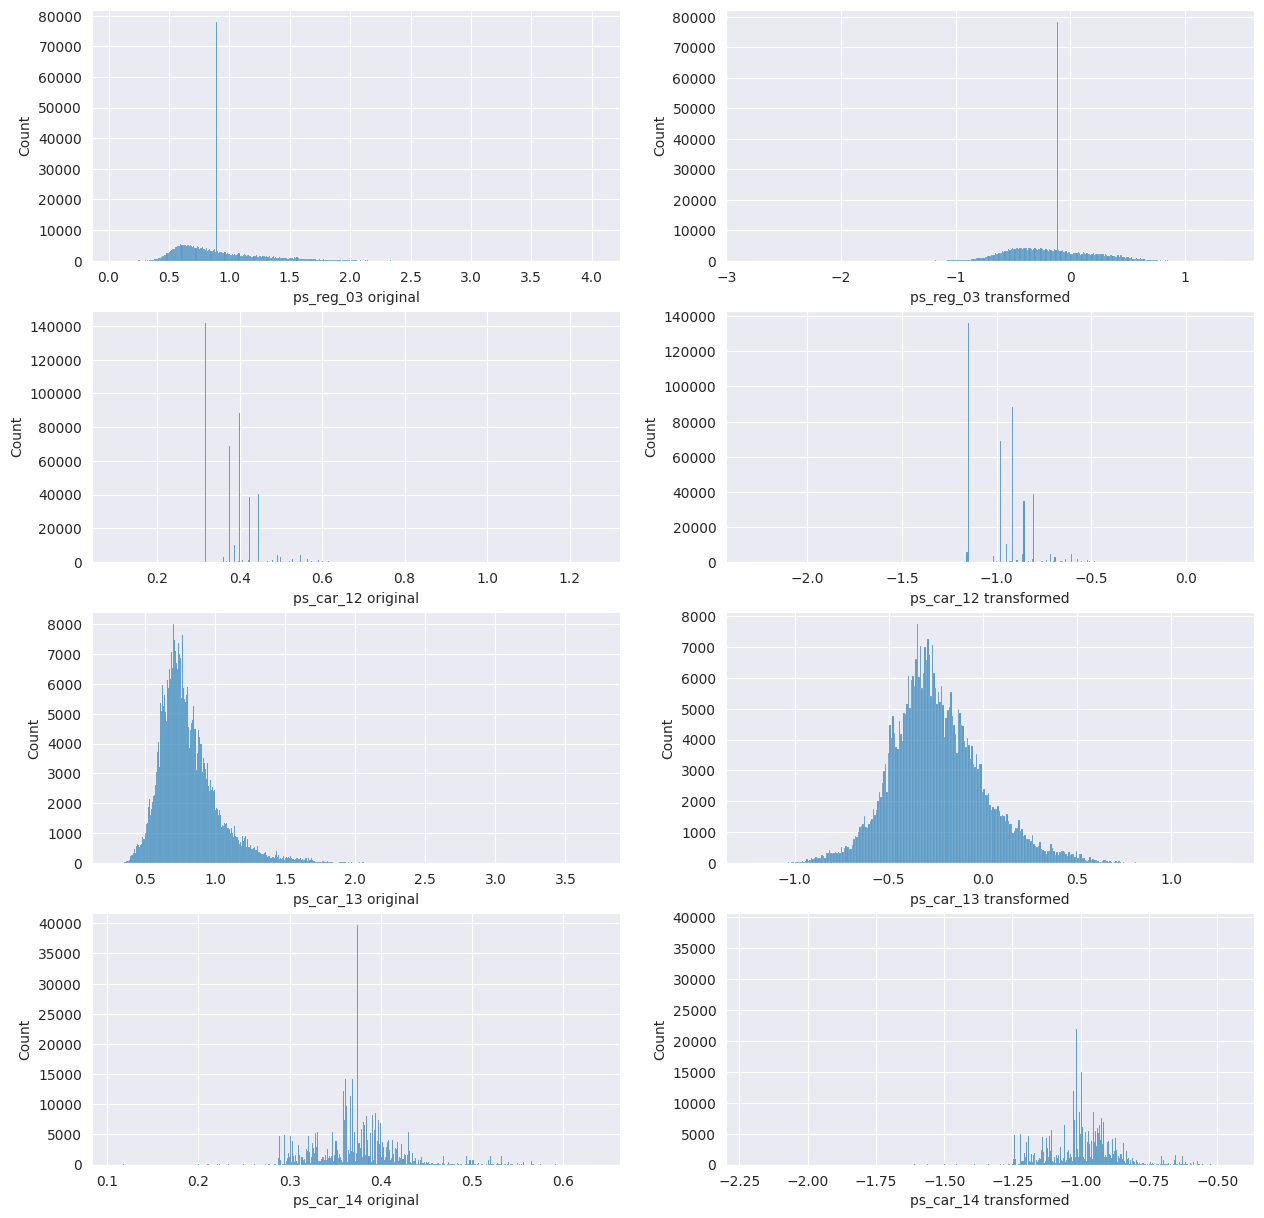

In [35]:
plot_original_transformed(train_num_var_cont,features=num_var_continuas)


A aplicação da tranfomação logarítimica aparentemente melhorou a distribuição dos dados para a variável ps_car_13

#### Transformação Yeo Jhonson

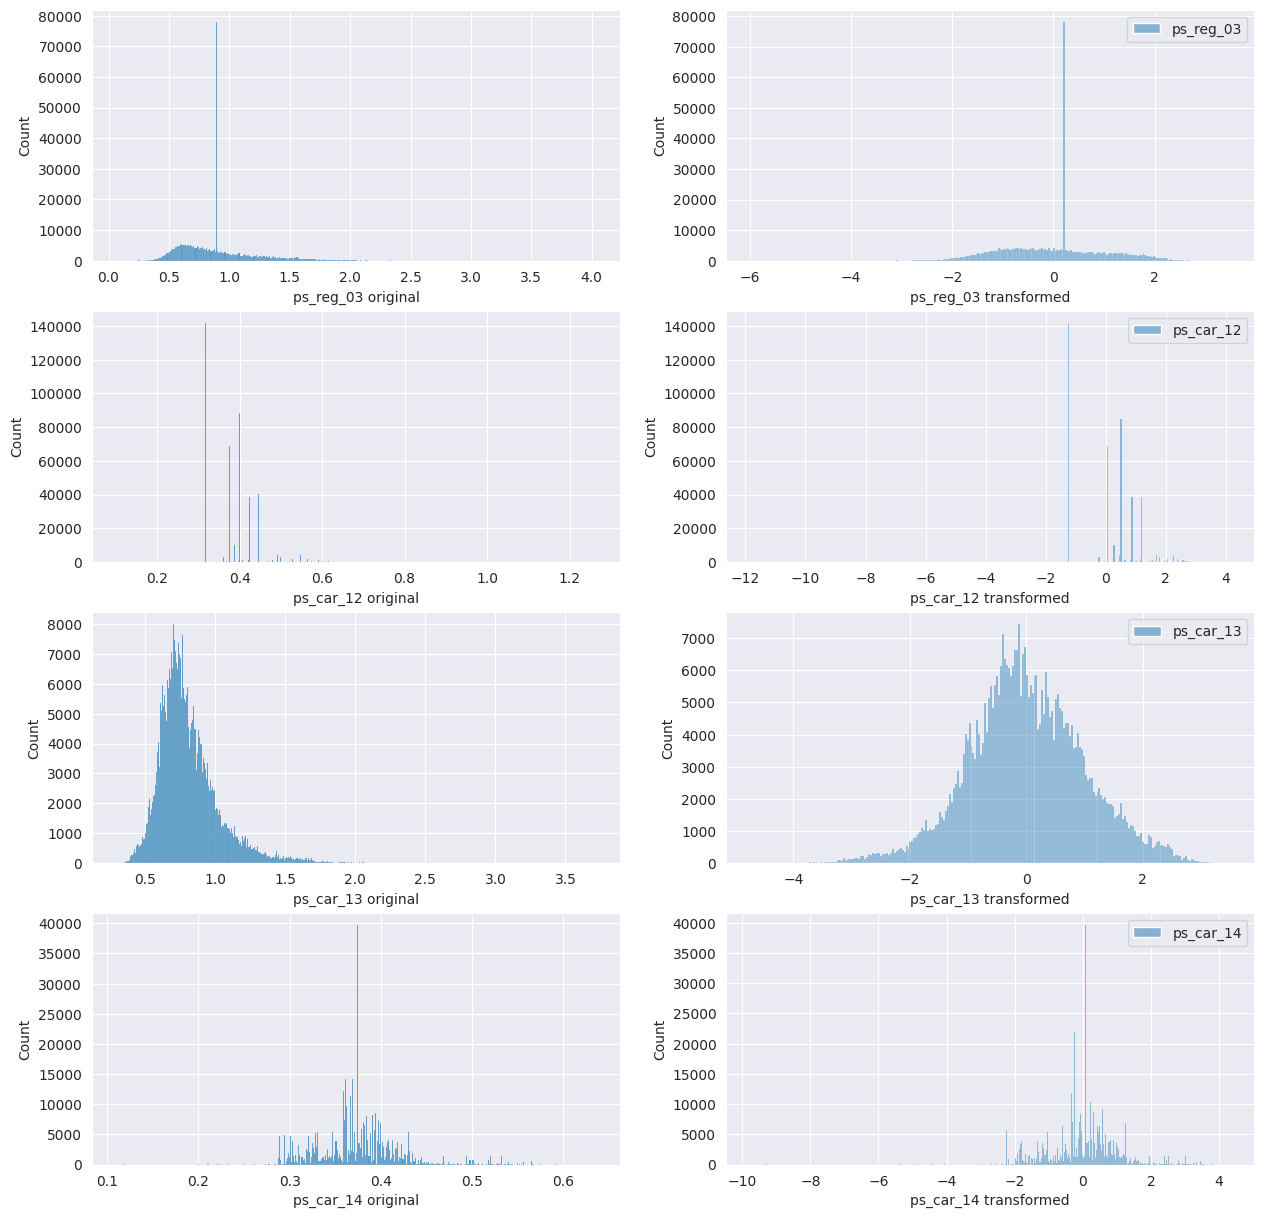

In [36]:
#Aplicar transformação Yeo-Jhonson aos dados numéricos continuos

plot_original_transformed(train_num_var_cont,features=num_var_continuas,tranformation='yeo')



A aplicação da transformação de Yeo_Jhonson aparentemente melhorou a distribuição das 4 features

### Correlação

- Variáveis altamente correlacionadas podem ser redundantes;
- Variáveis dever ser correlacionadas com o output para serem úteis na predição.

#### Correlação entre as variáveis numéricas contínuas (Pearson)

Para interpretar os valores calculados para os coeficientes de correlação serão usados os seguintes limites:

- Muito forte        : entre 0.8 e 1
- Forte              : entre 0.6 e 0.8
- Moderada           : entre 0.4 e 0.6
- Fraca              : entre 0.2 e 0.4
- Muito fraca        : entre 0 e 0.2
- Nenhuma correlação : 0

In [ ]:
#calculo da correlação
train_num_var_cont.corr()

,ps_reg_03,ps_car_12,ps_car_13,ps_car_14
ps_reg_03,1.000000,0.202792,0.238842,0.077080
ps_car_12,0.202792,1.000000,0.672353,0.577275
ps_car_13,0.238842,0.672353,1.000000,0.435003
ps_car_14,0.077080,0.577275,0.435003,1.000000


- Correlação forte entre ps_car_12 e ps_car_13;
- Correlação moderada entre ps_car_12 e ps_car_14;
- Correlação moderada entre ps_car_13 e ps_car_14

#### Correlação entre variáveis numéricas contínuas e o output binário

##### Coeficiente de correlação ponto-bisserial

O coeficiente de correlação ponto-bisserial mede a força da associação entre variáveis contínuas e variáveis binárias


In [38]:
#Calcular a correlação entre cada variável numérica e o output

def calcular_corr_ponto_bisserial(dados,features=None,y=x_train['target']):
    '''
    Função para cacular a correlação entre variáveis numéricas e e o output binário

    inputs
        dados    - Pandas dataframe com as features numéricas
        features - (list) Lista com features numéricas. Se não for passado serão usadas todas as features em dados
        y        - Pandas dataframe com um feature binária

    output
        coeff_df  - Pandas dataframe com duas colunas. Coluna corr com o coeficente de correlção calculado entre a feature e o output binário e 
                    colunas p_value para indicar se a correlação calculada tem significância estatistica (hipótese nula é que não existe correlação)   
    '''
    dados=dados.copy()
    if features is None:
        features=dados.columns
    corr_df={'feature':[],'corr':[],'p_value':[]}
    for coluna in features:
        coef,p=stats.pointbiserialr(dados[coluna],y)
        corr_df['feature'].append(coluna)
        corr_df['corr'].append(coef)
        corr_df['p_value'].append(p)
    corr_df=pd.DataFrame.from_dict(corr_df)
    return corr_df



In [39]:
#A correlação entre o target e cada variável numérica contínua é pequena. Porém os p-values indicam que a correlação existe
#Hipotese nula: não há correlação
#Para alpha=0.05 existe informação suficiente para rejeitar a hipótese nula com relação a todas as features

alpha=0.05 #nivel de significância
corr_num_cont_out=calcular_corr_ponto_bisserial(train_num_var_cont)
corr_num_cont_out['Correlated ?']=corr_num_cont_out['p_value']<alpha/2
corr_num_cont_out

,feature,corr,p_value,Correlated ?
0,ps_reg_03,0.032804,1.464601e-99,True
1,ps_car_12,0.040133,4.444677e-148,True
2,ps_car_13,0.055874,2.824230e-285,True
3,ps_car_14,0.010955,1.529801e-12,True


##### Teste t


Aplicação de teste t para testar se as médias das variáveis numéricas contínuas são iguais comparando-as para os clientes que solicitaram seguros e os que não solicitaram seguro.
As médias de cada feature devem ser diferentes nos dois grupos de clientes para que a feature possa ser usada como um preditor.

Hipótese:
- H0: médias iguais
- H1: médias diferentes

In [40]:
#dataframe somente com as variáveis contínuas
train_num_var_cont=pd.concat([train_num_var_cont,x_train['target']],axis=1)
train_num_var_cont.head()

,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,target
378330,0.986788,0.316228,0.688663,0.299166,1
8810,0.783422,0.316228,0.671821,0.301662,0
34911,1.017042,0.316228,0.822781,0.374690,0
42901,0.893728,0.316228,0.693312,0.368511,0
321695,0.467707,0.316228,0.691178,0.294449,0


In [41]:
#média e desvio padrão das variáveis numéricas contínuas agrupadas de acordo com o target
train_num_var_cont.groupby(by='target').agg(['mean','std'])

ps_reg_03           ps_car_12           ps_car_13           ps_car_14  \
            mean       std      mean       std      mean       std      mean   
target                                                                         
0       0.891350  0.311063  0.379538  0.058079  0.810790  0.222582  0.374597   
1       0.946007  0.337888  0.392033  0.063797  0.877747  0.263966  0.377165   

                  
             std  
target            
0       0.043761  
1       0.048237

In [42]:
#Para o calculo do t-test será considerado que as variâncias são iguais (comparativo entre target=0 e target=1)

t_test={'feature':[],'p_value':[]}

for feature in num_var_continuas:
    a=train_num_var_cont.loc[train_num_var_cont['target']==1,feature]	
    b=train_num_var_cont.loc[train_num_var_cont['target']==0,feature]	
    t_test['feature'].append(feature)
    t_test['p_value'].append(ttest_ind(a,b)[1])
t_test=pd.DataFrame.from_dict(t_test)



In [43]:
alpha=0.05 #Nível de significância
t_test['Média Igual?']=t_test['p_value']>alpha/2
t_test

#Considerando o nivel de variância de 0.05 existe evidência para rejeitar a hipótese nula de que as médias são iguais. Essa conclusão vale para todas as 
#features numéricas contínuas

,feature,p_value,Média Igual?
0,ps_reg_03,1.464601e-99,False
1,ps_car_12,4.444677e-148,False
2,ps_car_13,2.824230e-285,False
3,ps_car_14,1.529801e-12,False


- Todas as variáveis numéricas estão associadas com o output;
- Correlação forte entre ps_car_12 e ps_car_13


## Variáveis Numéricas Discretas

### Missing Values

In [44]:
#Número de missing values
x_train[num_var_discretas].isna().sum()

ps_ind_01     0
ps_ind_03     0
ps_ind_14     0
ps_ind_15     0
ps_reg_01     0
ps_reg_02     0
ps_car_11     4
ps_car_15     0
ps_calc_01    0
ps_calc_02    0
ps_calc_03    0
ps_calc_04    0
ps_calc_05    0
ps_calc_06    0
ps_calc_07    0
ps_calc_08    0
ps_calc_09    0
ps_calc_10    0
ps_calc_11    0
ps_calc_12    0
ps_calc_13    0
ps_calc_14    0
dtype: int64

In [45]:
#Proporção de missing values
(x_train[num_var_discretas].isna().sum())/len(x_train)

ps_ind_01     0.00000
ps_ind_03     0.00000
ps_ind_14     0.00000
ps_ind_15     0.00000
ps_reg_01     0.00000
ps_reg_02     0.00000
ps_car_11     0.00001
ps_car_15     0.00000
ps_calc_01    0.00000
ps_calc_02    0.00000
ps_calc_03    0.00000
ps_calc_04    0.00000
ps_calc_05    0.00000
ps_calc_06    0.00000
ps_calc_07    0.00000
ps_calc_08    0.00000
ps_calc_09    0.00000
ps_calc_10    0.00000
ps_calc_11    0.00000
ps_calc_12    0.00000
ps_calc_13    0.00000
ps_calc_14    0.00000
dtype: float64

In [46]:
#Substituir missing values para calcular da correlação

train_num_var_disc=x_train[num_var_discretas].copy()
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
train_num_var_disc=imputer.fit_transform(train_num_var_disc)


In [ ]:
#Nenhum missing value
train_num_var_disc.isna().sum()

ps_ind_01     0
ps_ind_03     0
ps_ind_14     0
ps_ind_15     0
ps_reg_01     0
ps_reg_02     0
ps_car_11     0
ps_car_15     0
ps_calc_01    0
ps_calc_02    0
ps_calc_03    0
ps_calc_04    0
ps_calc_05    0
ps_calc_06    0
ps_calc_07    0
ps_calc_08    0
ps_calc_09    0
ps_calc_10    0
ps_calc_11    0
ps_calc_12    0
ps_calc_13    0
ps_calc_14    0
dtype: int64

### Transformações

A transformação de Yeo Jhonson será aplicada para tentar melhorar a distribuição dos dados. A transformação logaritmica não será aplicada porque os dados tem valores nulos. A transformação serã aplicada a duas das variáveis, são elas:

- ps_car_15
- ps_reg_02

In [48]:
num_var_discretas_transformar=['ps_car_15','ps_reg_02']

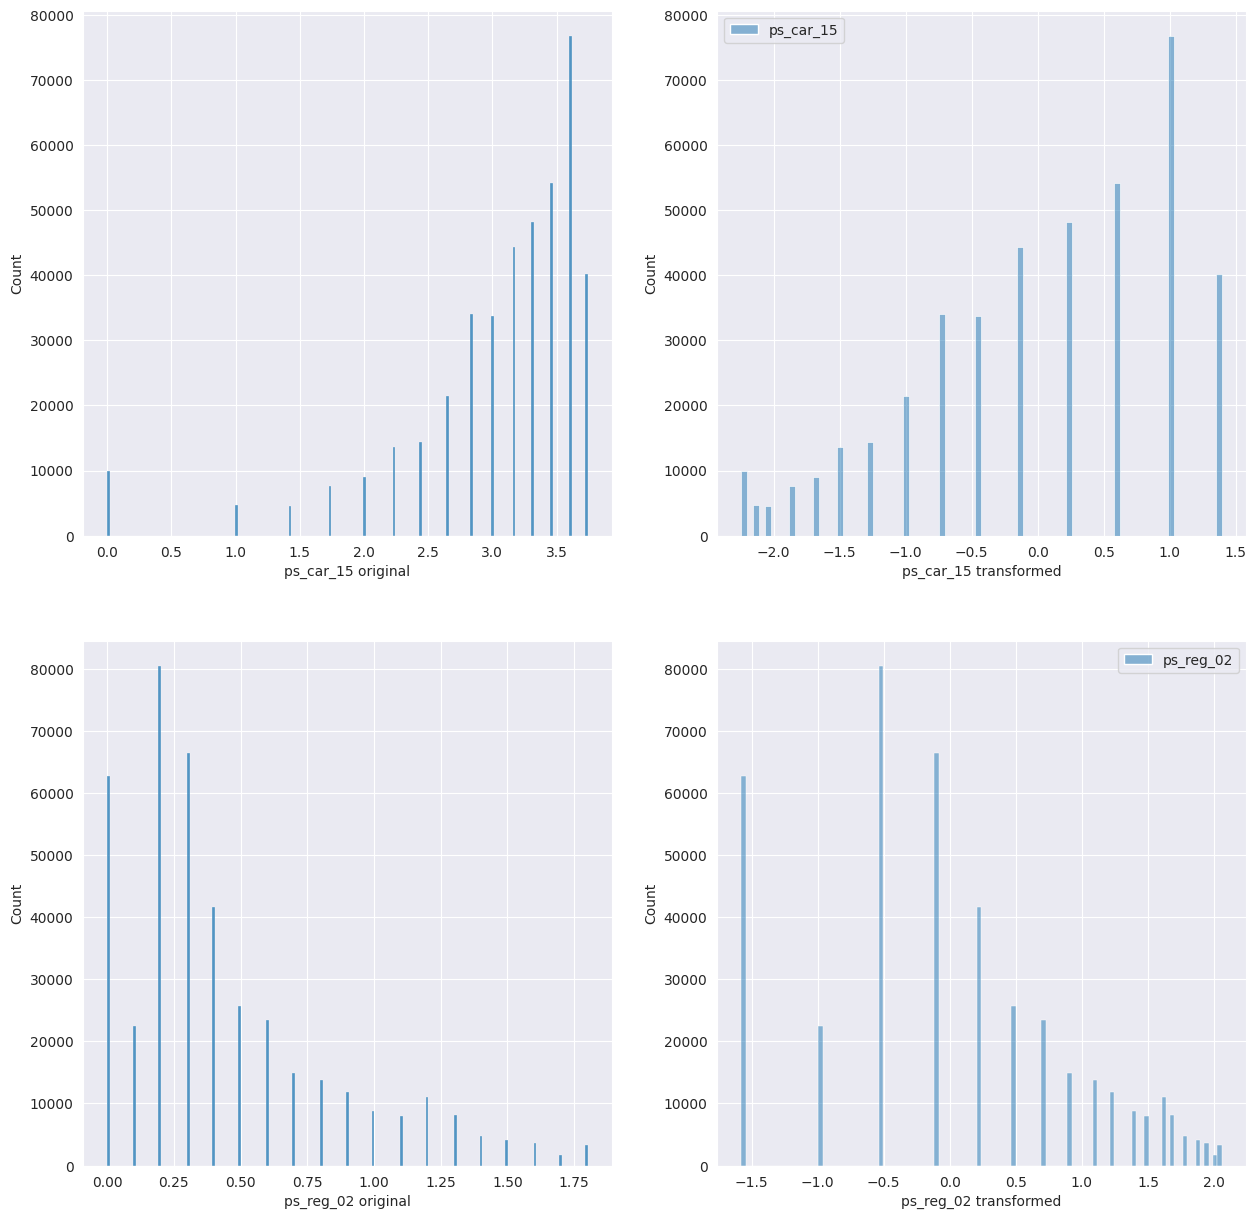

In [49]:
plot_original_transformed(train_num_var_disc,features=num_var_discretas_transformar,tranformation='yeo')

A transformação de Yeo Jhonson aparentemente melhorou a distribuição das duas variáveis numéricas discretas.

### Correlação

- Variáveis altamente correlacionadas podem ser redundantes;
- Variaveis correlacionadas com o output provavelmente são úteis para preve-lo.

#### Correlação entre as variáveis numéricas discretas

##### Coeficiente de correlação de postos de Spearman

O coeficiente de correlação de postos de Spearman é geralmente usado para medir o nivel de associação entre variáveis numéricas discretas.

Para interpretar os valores calculados para os coeficientes de correlação serão usados os seguintes limites:

- Muito forte        : entre 0.8 e 1
- Forte              : entre 0.6 e 0.8
- Moderada           : entre 0.4 e 0.6
- Fraca              : entre 0.2 e 0.4
- Muito fraca        : entre 0 e 0.2
- Nenhuma correlação : 0

In [50]:
#Calcular a correlação
corr_spearman=train_num_var_disc.corr(method='spearman')


In [51]:
#plotar a correlação em um heat map
fig = px.imshow(corr_spearman)
title='Correlação entre variáveis numéricas discretas'
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0},title={'text':title,'x':0.45,'xanchor':'center'},coloraxis_colorbar_x=0.75) #config
fig.show()

In [52]:
#A correlação  mais alta ocorre entre ps_reg_01 e ps_reg_02. A correlação entre as duas pode ser considerada moderada.
#Nenhuma das variáveis tem correlação positiva alta

#maiores correlações para cada feature
corr_spearman.where(corr_spearman!=1,0).max()


ps_ind_01     0.206099
ps_ind_03     0.206099
ps_ind_14     0.016524
ps_ind_15     0.163511
ps_reg_01     0.536303
ps_reg_02     0.536303
ps_car_11     0.064709
ps_car_15     0.052784
ps_calc_01    0.003075
ps_calc_02    0.004035
ps_calc_03    0.004035
ps_calc_04    0.003075
ps_calc_05    0.002316
ps_calc_06    0.002942
ps_calc_07    0.003192
ps_calc_08    0.003618
ps_calc_09    0.002159
ps_calc_10    0.003027
ps_calc_11    0.002889
ps_calc_12    0.003155
ps_calc_13    0.002889
ps_calc_14    0.002407
dtype: float64

In [53]:
#Nenhuma das variáveis tem correlação negativa alta

corr_spearman.where(corr_spearman!=1,0).min()

ps_ind_01    -0.102435
ps_ind_03    -0.063935
ps_ind_14    -0.109117
ps_ind_15    -0.109117
ps_reg_01    -0.057749
ps_reg_02    -0.002457
ps_car_11    -0.063935
ps_car_15    -0.102435
ps_calc_01   -0.003403
ps_calc_02   -0.003939
ps_calc_03   -0.001782
ps_calc_04   -0.002792
ps_calc_05   -0.002588
ps_calc_06   -0.002792
ps_calc_07   -0.001810
ps_calc_08   -0.003645
ps_calc_09   -0.001951
ps_calc_10   -0.003645
ps_calc_11   -0.001730
ps_calc_12   -0.002058
ps_calc_13   -0.002624
ps_calc_14   -0.001922
dtype: float64

#### Correlação entre as variáveis numéricas discretas e o output

##### Coeficiente de correlação ponto-bisserial

In [54]:
#Calcular correlação
corr_num_disc_out=calcular_corr_ponto_bisserial(train_num_var_disc,features=num_var_discretas,y=x_train['target'])


In [55]:
corr_num_disc_out

,feature,corr,p_value
0,ps_ind_01,0.019832,1.593828e-37
1,ps_ind_03,0.008103,1.692643e-07
2,ps_ind_14,0.007700,6.681458e-07
3,ps_ind_15,-0.021764,7.693319e-45
4,ps_reg_01,0.024017,3.215320e-54
5,ps_reg_02,0.036741,2.042230e-124
6,ps_car_11,-0.000580,7.083042e-01
7,ps_car_15,0.028399,4.371179e-75
8,ps_calc_01,0.001822,2.394443e-01
9,ps_calc_02,0.001485,3.376598e-01


In [56]:
#A correlação entre cada variável e o output é pequena
#H0: não existe correlação
#Para algumas das variáveis não é possível rejeitar a hipótese nula

#Coluna correlated=True quando a hipótese nula foi rejeitada
alpha=0.05 #nivel de significancia adotado
corr_num_disc_out['Correlated?']=corr_num_disc_out['p_value']<alpha/2
corr_num_disc_out

,feature,corr,p_value,Correlated?
0,ps_ind_01,0.019832,1.593828e-37,True
1,ps_ind_03,0.008103,1.692643e-07,True
2,ps_ind_14,0.007700,6.681458e-07,True
3,ps_ind_15,-0.021764,7.693319e-45,True
4,ps_reg_01,0.024017,3.215320e-54,True
5,ps_reg_02,0.036741,2.042230e-124,True
6,ps_car_11,-0.000580,7.083042e-01,False
7,ps_car_15,0.028399,4.371179e-75,True
8,ps_calc_01,0.001822,2.394443e-01,False
9,ps_calc_02,0.001485,3.376598e-01,False


##### Teste Chi Quadrado

Teste chi quadrado para aviliar a correlaçao entre as variáveis numéricas discretas e o output

In [57]:
def teste_chi_quadrado(dados,features=None,y=x_train['target']):
    '''
    Função testar a independência entre as features numericas  discretas e o output. A independência será testada através do
    teste chi quadrado

    inputs    
        dados    - Pandas dataframe com as features numéricas discretas
        features - (list) Lista com as features numéricas discretas. Se não for passados serão consideradas todas as colunas em dados
        y        - targe value. Resposta se cliente solicitou ou não o seguro
    
    output
        results  - Pandas dataframe com valor do teste chi quadrado, p value e degrees of freedom

    '''
    dados=dados.copy() #não alterar o dataframe original
    if features is None:
        features=dados.columns
    results={'feature':[],'chi2':[],'p':[],'dof':[]}
    for coluna in features:
        x=dados[coluna]
        contingency_table=pd.crosstab(x,y)
        chi2, p, dof, con_table = chi2_contingency(contingency_table)
        results['feature'].append(coluna)
        results['chi2'].append(chi2)
        results['p'].append(p)
        results['dof'].append(dof)
    results=pd.DataFrame.from_dict(results)
    return results



In [58]:
#calcular teste chi quadrado
chi2_num_disc_out=teste_chi_quadrado(train_num_var_disc,features=num_var_discretas)

In [ ]:
#H0: não existe correlação
#Para algumas variáveis não existe evidência suficiente para rejeitar a hipótese nula

#Coluna Correlated?=True quando existe evidência para rejeitar a hipótese nula


alpha=0.05 #nivel de significancia adotado
chi2_num_disc_out['Correlated?']=chi2_num_disc_out['p']<alpha/2
chi2_num_disc_out

,feature,chi2,p,dof,Correlated?
0,ps_ind_01,196.961678,5.048589e-39,7,True
1,ps_ind_03,445.945326,1.050249e-88,11,True
2,ps_ind_14,32.339084,1.630857e-06,4,True
3,ps_ind_15,242.406541,2.410967e-44,13,True
4,ps_reg_01,345.688953,5.123653e-69,9,True
5,ps_reg_02,713.444265,7.952221e-140,18,True
6,ps_car_11,182.051915,3.179310e-39,3,True
7,ps_car_15,422.956564,1.831682e-81,14,True
8,ps_calc_01,10.917634,2.813970e-01,9,False
9,ps_calc_02,6.779248,6.600906e-01,9,False


- Nenhuma variável contínua discreta está correlacionada fortemente com outra;
- ps_calc_01, ps_calc_02 e assim por diante até ps_calc_14 não estão associadas com o output (nesse caso considerei que existe associação caso o resultado de dois testes produziram resultados conflitantes).

## Variáveis Categóricas

### Labels raras

In [60]:
#verificar se dentre as variáveis categóricas alguma tem labels raras

rare_labels=[]
for feature in cat_var:
    if  not ((x_train[feature].value_counts()/len(x_train))>0.01).all():
        rare_labels.append(feature)

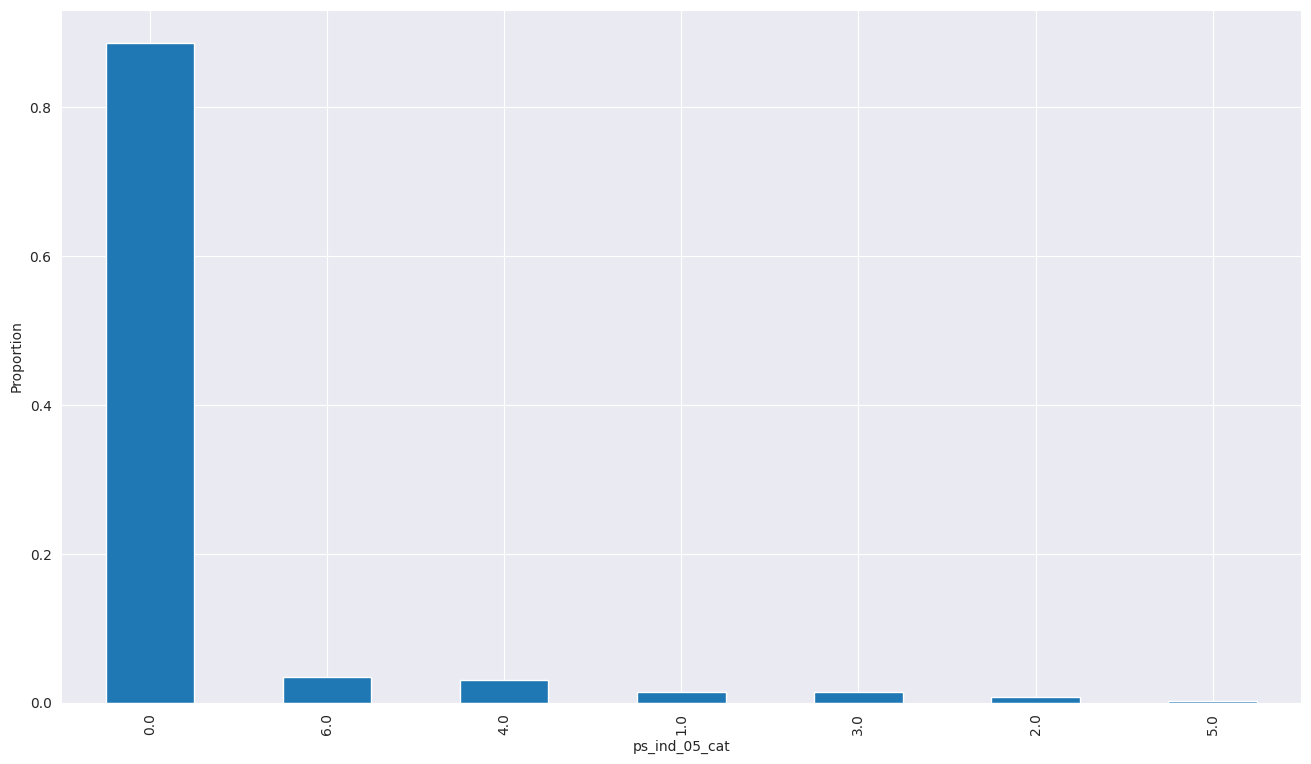

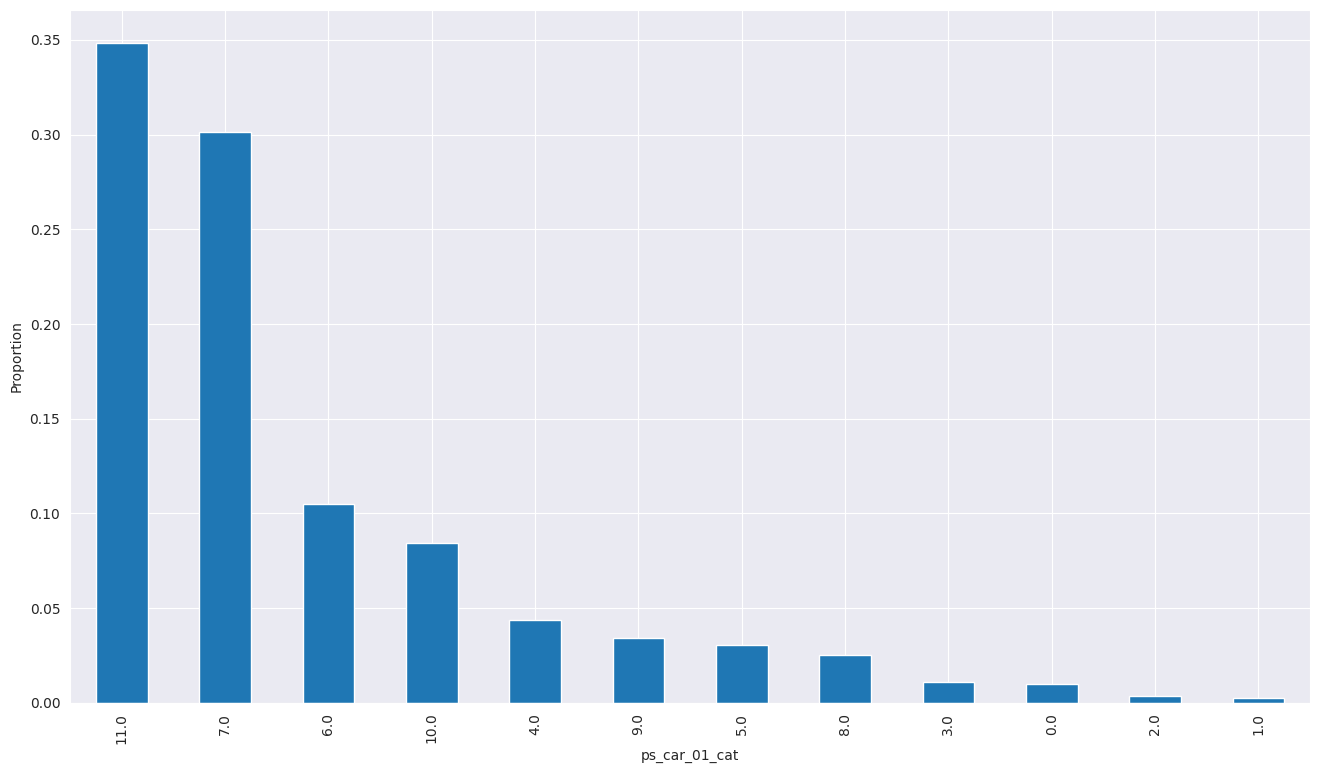

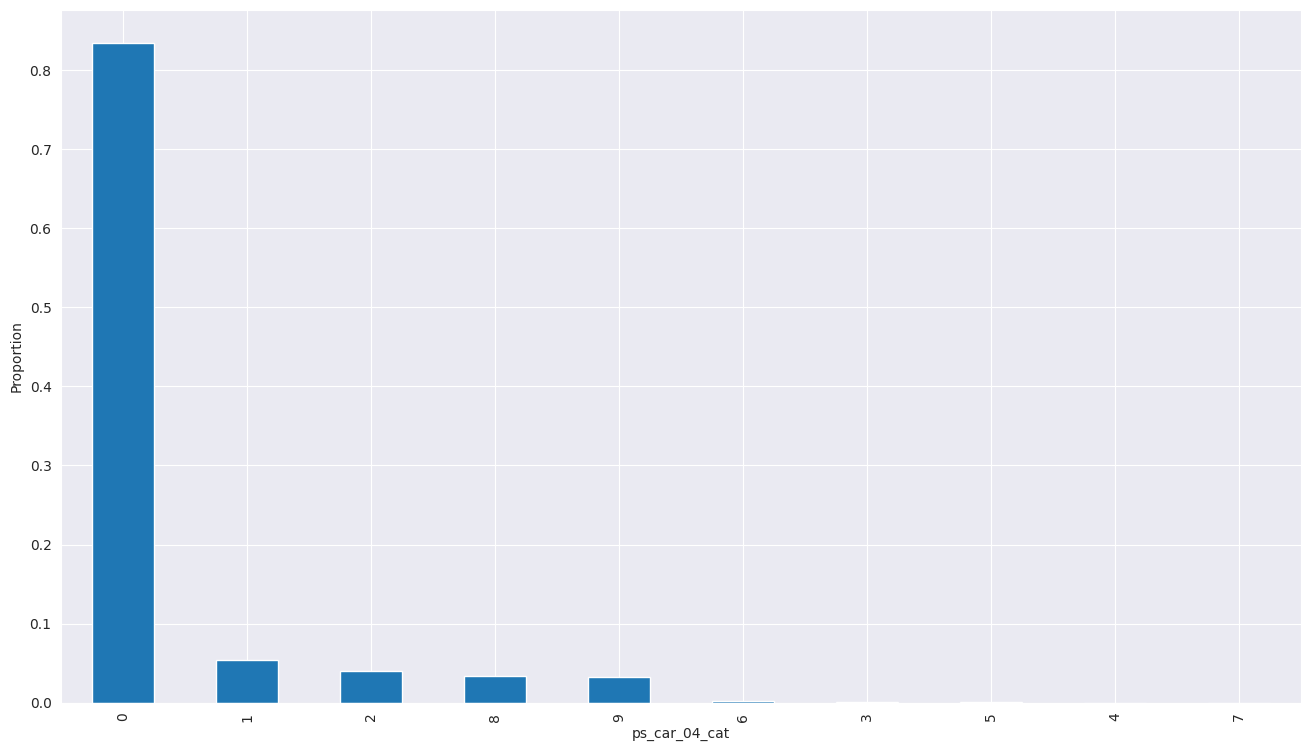

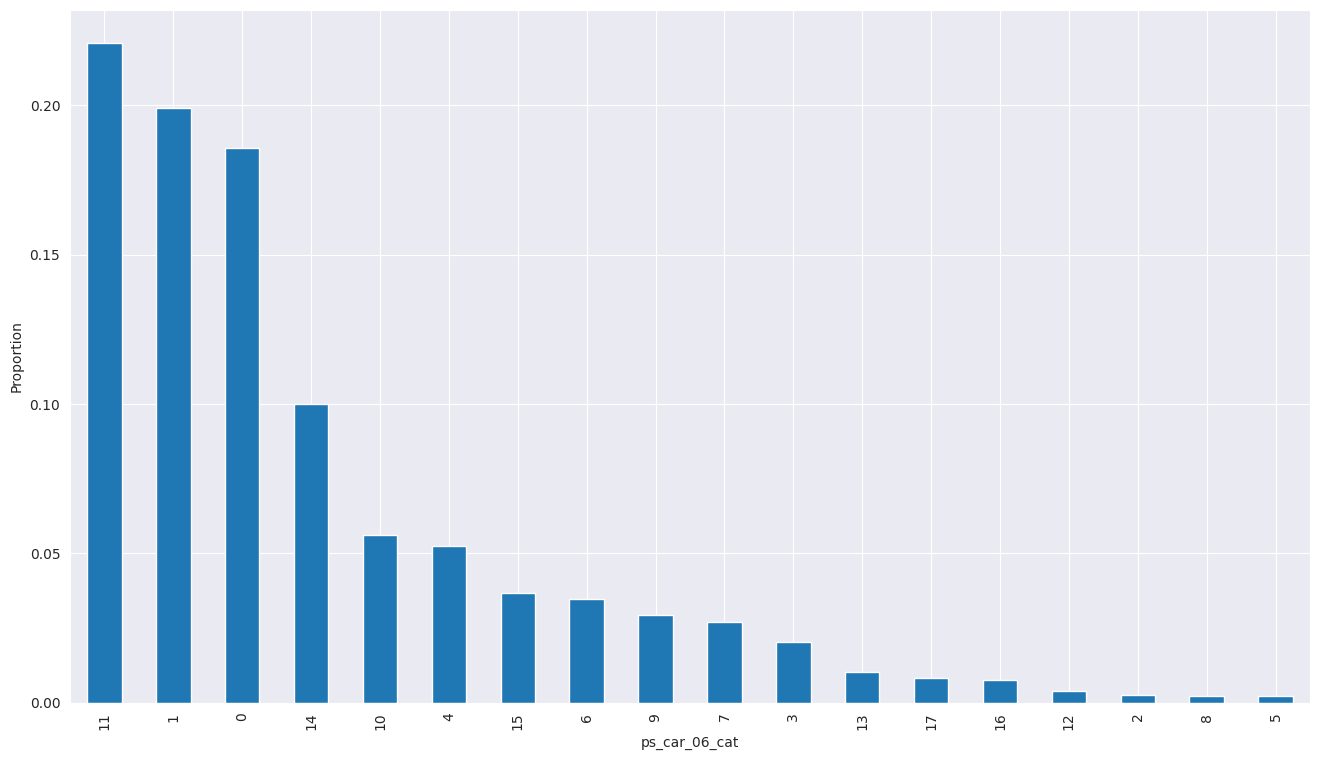

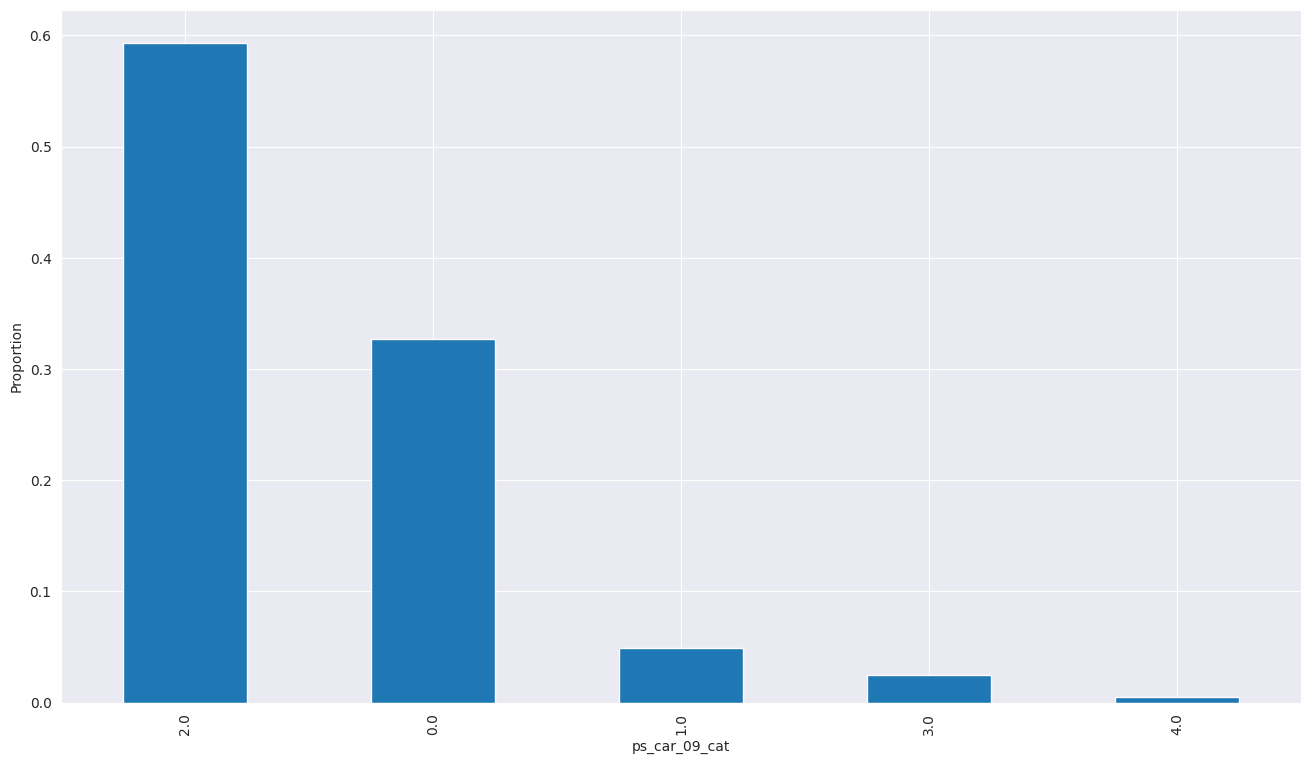

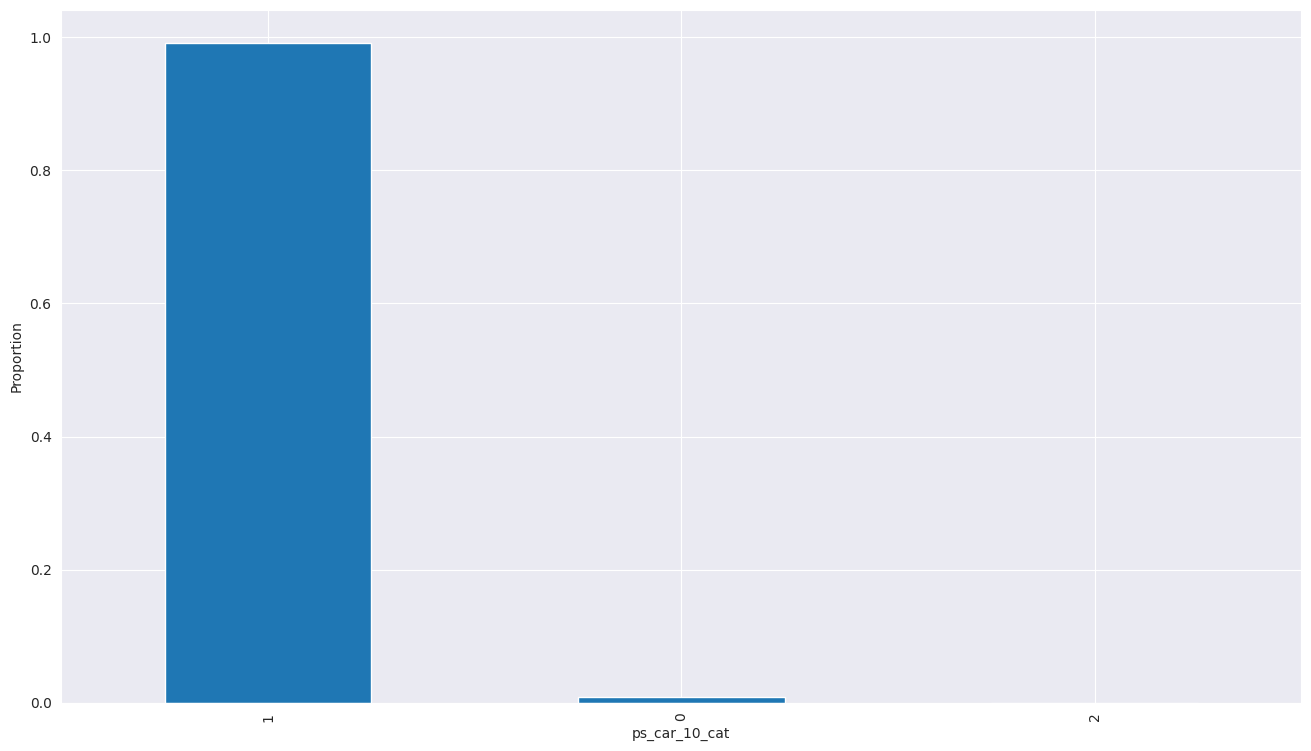

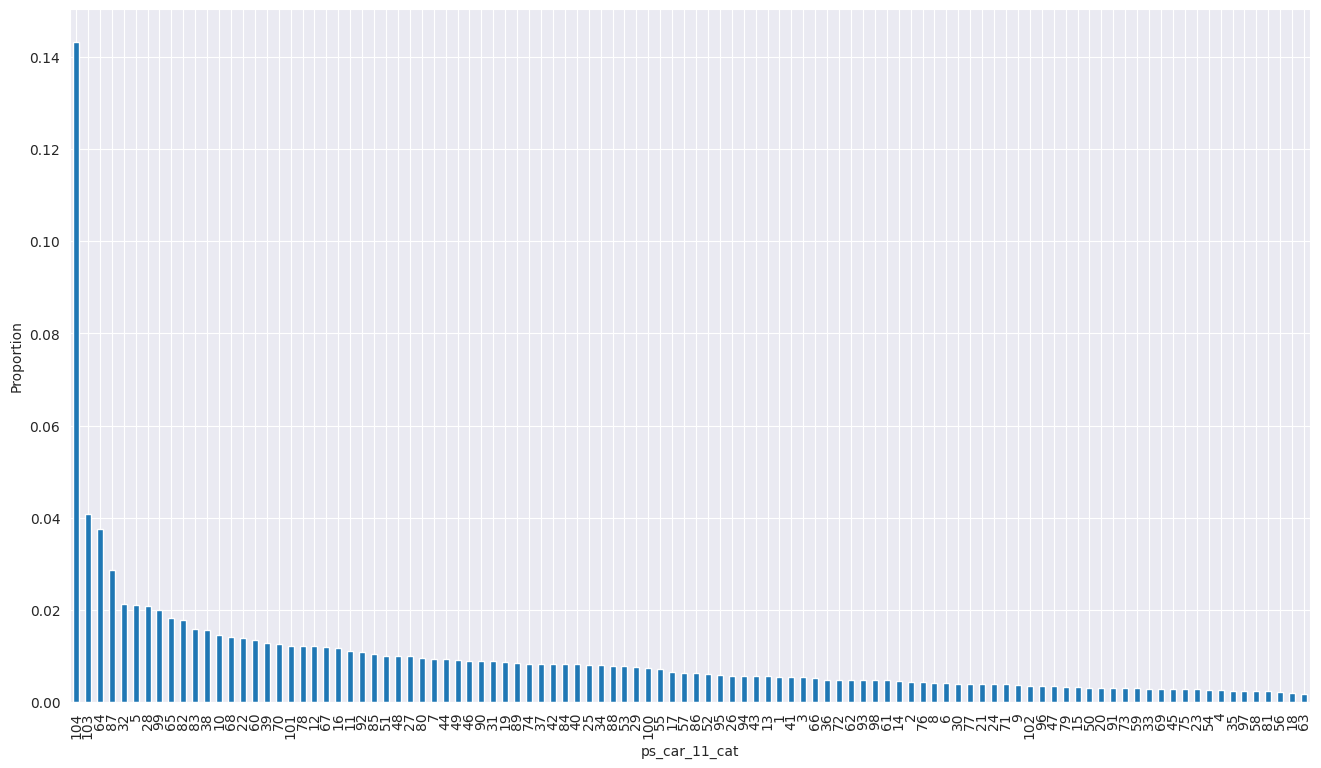

In [61]:
for feature in rare_labels:
    plt.figure(figsize=(16,9))
    plt.ylabel('Proportion')
    plt.xlabel('Feature')
    (x_train[feature].value_counts()/len(x_train)).plot.bar()

### Correlação

#### Correlação entre as variáveis categóricas

##### Teste Cramer V e Chi Quadrado

- O teste Cramer V será usado para calcular o nivel de associação entre cada par de variável categórica.
- O teste chi-quadrado vai ser usado para indicar se existe associação entre cada par de variável categórica

In [62]:
#Função para calcular o teste chi quadrado e o nivel de associação Cramer para as variáveis categóricas


def association_categorical_features(data,features=cat_var):
    '''
    Função para calcular a associaçaõ entre variáveis categóricas.
    Para o calculo será usado o teste chi-quadrado para indicar se existe associação entre as variáveis e o teste Cramaer V para mensusar a associação
    A função retorna os graus de liberdade nos calculo do nivel de associação Cramer. O valor dos graus de liberdade é necessário para interpretação do
    nivel de associação

    Inputs:
        data- Pandas dataframe com as variáveis categŕicas
    
    Outuputs
        chi_squared_matrix - pandas dataframe com os coeficiente p calculados utilizando o teste chi-quadrado
        cramers_matrix     - pandas dataframe com os valores indicando o nivel de associação entre as variáveis. Para esse cáculo foi usado o teste Cramer
        cramers_df_matrix  - pandas dataframe. Graus de liberdade no teste Cramer. Necessário para interpretação dos valores
    '''
    data=data.copy()
    data=data.loc[:,features]
    columns=data.columns
    n_columns=len(data.columns)
    cramers_matrix     =np.ones(shape=[n_columns,n_columns])
    chi_squared_matrix =np.ones(shape=[n_columns,n_columns])
    cramers_df_matrix  =np.ones(shape=[n_columns,n_columns])
    #itertools.combinations - it is an alternative to using two for loops
    for i in range(n_columns):
        for j in range(i+1,n_columns):
            x=data[[columns[i],columns[j]]].copy()
            x.dropna(inplace=True)
            names=x.columns
            x=pd.crosstab(x[names[0]],x[names[1]])
            chi2, p, dof, con_table = chi2_contingency(x) # cácilo do teste chi-quadrado
            chi_squared_matrix[i,j]=p
            chi_squared_matrix[j,i]=p

            #Calculo do coeficiente de Cramer V
            #Para calculo será usada correcao para evitar bias
            n=x.values.sum() #Numero total de elementos
            r, k = x.shape   #número de linhas e de colunas
            phi2 = chi2 / n  
            phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1)) 
            rcorr = r - ((r-1)**2)/(n-1)
            kcorr = k - ((k-1)**2)/(n-1)
            cramers_dof=min(x.shape)-1        #calculo degrees of freedom
            if min((kcorr-1), (rcorr-1)) !=0: #Testar para valor nulo no denominador
                cramers_v=np.sqrt(phi2corr / min((kcorr-1), (rcorr-1))) 
            else: 
                cramers_v=0
            cramers_matrix[i,j]   =cramers_v
            cramers_matrix[j,i]   =cramers_v
            cramers_df_matrix[i,j]=cramers_dof
            cramers_df_matrix[j,i]=cramers_dof
    chi_squared_matrix =pd.DataFrame(chi_squared_matrix, index=columns, columns=columns)
    cramers_df_matrix  =pd.DataFrame(cramers_df_matrix, index=columns, columns=columns)
    cramers_matrix     =pd.DataFrame(cramers_matrix, index=columns, columns=columns)
    return chi_squared_matrix,cramers_matrix,cramers_df_matrix



In [63]:
#Calcular o teste chi-quadrado e o nivel de associação cramer para as variáveis categóricas

chi_squared_cat, cramer_cat, df_cramer_cat=association_categorical_features(x_train)


In [64]:
#Plotar heat map com resultado do teste chi quadrado
def heat_map_significance(df_p_values,alpha,size=[12,8]):
    '''
    Função para plotar heat map com as cores indicando se existe ou não associação entre as variáveis

    Inputs:
       df_p_values: pandas dataframe com os p values calculados usado o teste chi-quadrado
       alpha      : nivel de significância

    '''
    cmap = sns.mpl_palette("Set1", 2) #Return a palette or colormap from the matplotlib registry.
    legend_handles = [Patch(color=cmap[True], label='Existe Associação'),  # red
                  Patch(color=cmap[False], label='Não há associação')]   # green
    plt.legend(handles=legend_handles, ncol=2, bbox_to_anchor=[0.5, 1.02], loc='lower center', 
           fontsize=8, handlelength=.8)
    sns.heatmap(df_p_values<alpha,cmap=cmap,cbar=False)



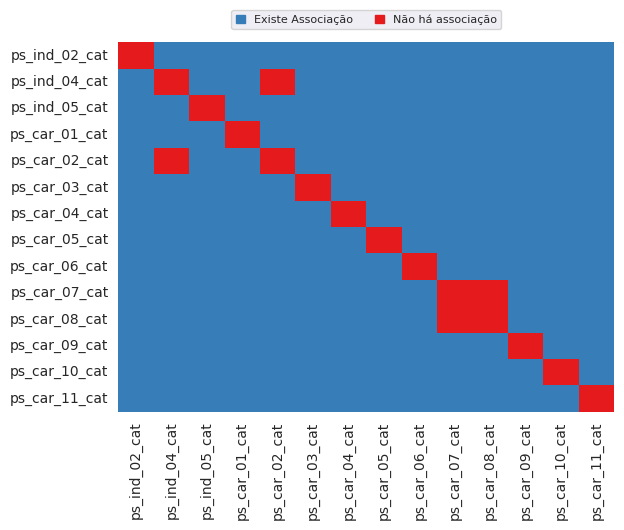

In [65]:
heat_map_significance(chi_squared_cat,0.05)


In [66]:
#A função interpretacao_cramer converte o valor dos teste Cramer para um nivel de associação que é facilmente interpretável
#A função converter_df_cramer_values_niveis converte um dataframe contendo os valores do teste Cramer entre diversas variáveis e converte todos esses valoores para niveis facilmente interpretáveis.
#A função converter_df_cramer_values_niveis utiliza a função interpretacao_cramer

def interpretacao_cramer(degrees_freedom,cramer_value):
    '''
    Interpretação do valores do teste Cramer utilizando os graus de liberdade (degrees of freedom)
    Os valores usados para interpretação baseiam-se em  Cohen, J. (1988). Statistical power analysis for the behavioral sciences (2nd ed).
    Converte um valor do teste Cramer e o grau de liberdade correspondente para um nivel de associação entre variáveis

    Inputs-
        degrees_freedom - graus de liberdade
        cramer_value    - valor calculado para o teste Cramer

    Outputs-
        String indicando o nivel de associação entre as variáveis

    '''
    if degrees_freedom==1:
        if cramer_value<=0.1:
            i='negligenciavel'
        elif 0.1<cramer_value<=0.3:
            i='pequeno'
        elif 0.3<cramer_value<=0.5:
            i='medio'
        else:
            i='grande'

    elif degrees_freedom==2:
        if cramer_value<=0.07:
            i='negligenciavel'
        elif 0.07<cramer_value<=0.21:
            i='pequeno'
        elif 0.21<cramer_value<=0.35:
            i='medio'
        else:
            i='grande'

    elif degrees_freedom==3:
        if cramer_value<=0.06:
            i='negligenciavel'
        elif 0.06<cramer_value<=0.17:
            i='pequeno'
        elif 0.17<cramer_value<=0.29:
            i='medio'
        else:
            i='grande'

    elif degrees_freedom==4:
        if cramer_value<=0.05:
            i='negligenciavel'
        elif 0.05<cramer_value<=0.15:
            i='pequeno'
        elif 0.15<cramer_value<=0.25:
            i='medio'
        else:
            i='grande'

    elif degrees_freedom>=5:
        if cramer_value<=0.05:
            i='negligenciavel'
        elif 0.05<cramer_value<=0.13:
            i='pequeno'
        elif 0.13<cramer_value<=0.22:
            i='medio'
        else:
            i='grande'

    return i

def converter_df_cramer_values_niveis(cramers_value,cramers_df,converter_valor_nivel=interpretacao_cramer):
    '''
    Função que vai converter um dataframe contendo os valores do teste Cramer entre variáveis para um dataframe contendo níveis de associação entre as variáveis.
    São possíveis quatro níveis de associação:negligenciável,pequeno,médio e fraco
    

    Inputs
        cramers_value         - Pandas dataframe com os valores do teste Cramer para as variáveis
        cramers_df            - Pandas dataframe com os graus de liberdade do teste Cramer entre as variáveis
        converter_valor_nivel - Função para converter um único valor de Cramer e de grau de liberdade para um unível de associação
    Outputs
        level - PAndas dataframe com os niveis de associação entre as variáveis
    '''
    level=cramers_value.copy().astype('string')
    n=level.shape[0]
    for i in range(n):
        for j in range(n):
            df=cramers_df.iloc[i,j]
            cv=cramers_value.iloc[i,j]
            level.iloc[i,j]=converter_valor_nivel(df,cv)
    return level



In [67]:
#converter os valores do niveis de associação calculados para niveis facilmente inerpretáveis
cat_nivel_associacao_cramer=converter_df_cramer_values_niveis(cramer_cat,df_cramer_cat)

In [68]:
cat_nivel_associacao_cramer

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
ps_ind_02_cat,grande,pequeno,negligenciavel,negligenciavel,negligenciavel,negligenciavel,negligenciavel,negligenciavel,negligenciavel,negligenciavel,negligenciavel,negligenciavel,negligenciavel,pequeno
ps_ind_04_cat,pequeno,grande,negligenciavel,pequeno,negligenciavel,negligenciavel,pequeno,negligenciavel,pequeno,negligenciavel,negligenciavel,negligenciavel,negligenciavel,pequeno
ps_ind_05_cat,negligenciavel,negligenciavel,grande,pequeno,negligenciavel,negligenciavel,negligenciavel,negligenciavel,negligenciavel,negligenciavel,negligenciavel,pequeno,negligenciavel,negligenciavel
ps_car_01_cat,negligenciavel,pequeno,pequeno,grande,pequeno,negligenciavel,pequeno,negligenciavel,pequeno,medio,negligenciavel,grande,negligenciavel,pequeno
ps_car_02_cat,negligenciavel,negligenciavel,negligenciavel,pequeno,grande,negligenciavel,medio,negligenciavel,grande,negligenciavel,negligenciavel,pequeno,negligenciavel,grande
ps_car_03_cat,negligenciavel,negligenciavel,negligenciavel,negligenciavel,negligenciavel,grande,negligenciavel,negligenciavel,pequeno,negligenciavel,medio,pequeno,negligenciavel,medio
ps_car_04_cat,negligenciavel,pequeno,negligenciavel,pequeno,medio,negligenciavel,grande,negligenciavel,grande,pequeno,negligenciavel,pequeno,negligenciavel,grande
ps_car_05_cat,negligenciavel,negligenciavel,negligenciavel,negligenciavel,negligenciavel,negligenciavel,negligenciavel,grande,negligenciavel,negligenciavel,pequeno,negligenciavel,negligenciavel,pequeno
ps_car_06_cat,negligenciavel,pequeno,negligenciavel,pequeno,grande,pequeno,grande,negligenciavel,grande,negligenciavel,pequeno,pequeno,negligenciavel,grande
ps_car_07_cat,negligenciavel,negligenciavel,negligenciavel,medio,negligenciavel,negligenciavel,pequeno,negligenciavel,negligenciavel,grande,negligenciavel,negligenciavel,negligenciavel,pequeno


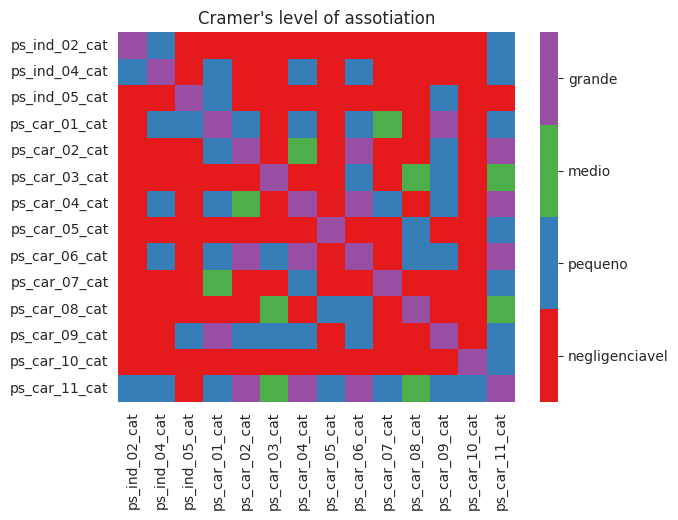

In [69]:
#Plotar o dataframe com os niveis de associação Cramer como um hatmap
def converter_nivel_para_numerico(nivel):
      '''
      Função que converte cada nivel de associação para um valor numérico. Esses valores numéricos permitirão a criação de um heatmap
      '''
      if nivel=='grande':
        return 255
      if nivel=='medio':
        return 128
      if nivel=='pequeno':
        return 64 
      if nivel=='negligenciavel':
        return 0

nivel_associacao_cramer_numerico=cat_nivel_associacao_cramer.map(converter_nivel_para_numerico)
n=4 #quarto nivels de associação
cmap = sns.color_palette("Set1",n,True)
ax=sns.heatmap(nivel_associacao_cramer_numerico, cmap=cmap) 
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(['negligenciavel','pequeno','medio','grande'])                                          
plt.title("Cramer's level of assotiation")
plt.show()


#### Correlação entre as variáveis categóricas e o output

##### Teste Chi Quadrado

- O teste chi quadrado será usado para testar se existe correlação entre as variáveis categóricas e o output. 

In [70]:
#Caĺculo do teste chi quadrado
chi2_cat_out = teste_chi_quadrado(x_train,features=cat_var,y=x_train['target'])

In [71]:
# Hipótese nula: não há correlação
#Coluna Correlated? =True quando existe evidência para rejeitar a hipótese nula

alpha=0.05 #nivel de significancia adotado
chi2_cat_out['Correlated?']=chi2_cat_out['p']<alpha/2
chi2_cat_out

,feature,chi2,p,dof,Correlated?
0,ps_ind_02_cat,16.089250,1.087193e-03,3,True
1,ps_ind_04_cat,46.921895,7.387280e-12,1,True
2,ps_ind_05_cat,545.068553,1.632552e-114,6,True
3,ps_car_01_cat,594.746182,1.862549e-120,11,True
4,ps_car_02_cat,428.160282,4.086058e-95,1,True
5,ps_car_03_cat,57.731485,3.004548e-14,1,True
6,ps_car_04_cat,660.824003,1.817828e-136,9,True
7,ps_car_05_cat,0.977379,3.228469e-01,1,False
8,ps_car_06_cat,621.331639,4.316522e-121,17,True
9,ps_car_07_cat,176.059243,3.514787e-40,1,True


- Variáveis com nível de associação forte segundo o teste de Cramer:
    - ps_car_01_cat e ps_car_09_cat
    - ps_car_02_cat e ps_car_06_cat
    - ps_car_02_cat e ps_car_11_cat
    - ps_car_04_cat e ps_car_06_cat
    - ps_car_04_cat e ps_car_11_cat
    - ps_car_06_cat e ps_car_11_cat 

- Variáveis não associadas com o output:
    -   ps_car_05_cat
    -   ps_car_10_cat


## Variáveis Binárias

### Missing Values

In [72]:
#Nenhum missing value nas variáveis binárias
x_train[bin_var].isna().sum()

ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_calc_15_bin    0
ps_calc_16_bin    0
ps_calc_17_bin    0
ps_calc_18_bin    0
ps_calc_19_bin    0
ps_calc_20_bin    0
dtype: int64

### Correlação

#### Teste Chi quadrado para testar se há associação entre as variáveis binárias

In [73]:
def association_binary_features(data,features=bin_var):
    '''
    
    Função para testar se existe associação entre variáveis binárias
    Hipótese nula - não existe associação
    Hipótese alternativa - existe associação

    Inputs:
        data- Pandas dataframe com as variáveis binárias
    
    Outuputs
        chi_squared_matrix - pandas dataframe com os coeficiente p calculados utilizando o teste chi-quadrado
    '''
    data=data.copy()
    data=data.loc[:,features]
    columns=data.columns
    n_columns=len(data.columns)
    chi_squared_matrix =np.ones(shape=[n_columns,n_columns])
    #itertools.combinations - it is an alternative to using two for loops
    for i in range(n_columns):
        for j in range(i+1,n_columns):
            x=data[[columns[i],columns[j]]].copy()
            x.dropna(inplace=True)
            names=x.columns
            x=pd.crosstab(x[names[0]],x[names[1]])
            chi2, p, dof, con_table = chi2_contingency(x) # cálculo do teste chi-quadrado
            chi_squared_matrix[i,j]=p
            chi_squared_matrix[j,i]=p
    chi_squared_matrix=    chi_squared_matrix =pd.DataFrame(chi_squared_matrix, index=columns, columns=columns)
    return chi_squared_matrix

In [74]:
#calcular o teste chi quadrado para as variáveis binárias e o target
bin_chi_quadrado=association_binary_features(x_train,features=bin_var+['target'])


In [75]:
bin_chi_quadrado

,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target
ps_ind_06_bin,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.066262e-09,3.867349e-04,1.500941e-34,5.483933e-11,5.699204e-71,2.910489e-120,4.296705e-13,0.217499,0.502596,0.515701,0.625268,0.096311,0.644562,4.418130e-110
ps_ind_07_bin,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.570967e-13,6.676065e-09,1.600290e-123,2.327032e-16,0.000000e+00,1.673962e-41,0.000000e+00,0.151072,0.475763,0.355412,0.646801,0.343803,0.866472,3.857827e-107
ps_ind_08_bin,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.750547e-04,1.876982e-14,1.344213e-17,8.188481e-09,1.395912e-04,1.079013e-113,1.043135e-98,0.002296,0.281090,0.308580,0.564082,0.647390,0.290804,8.066717e-19
ps_ind_09_bin,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.855885e-05,6.871616e-21,2.302213e-83,8.562189e-11,1.593773e-153,6.932023e-14,3.792935e-151,0.796650,0.284828,0.375371,0.562000,0.560903,0.819979,2.392384e-07
ps_ind_10_bin,6.066262e-09,1.570967e-13,5.750547e-04,1.855885e-05,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.442314e-53,1.153811e-02,5.169857e-72,0.013277,0.340861,0.900655,0.686879,0.632341,0.049925,3.000364e-02
ps_ind_11_bin,3.867349e-04,6.676065e-09,1.876982e-14,6.871616e-21,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.018717e-270,6.512119e-02,0.000000e+00,0.392944,0.538749,0.927083,0.397170,0.164915,0.578450,8.550733e-02
ps_ind_12_bin,1.500941e-34,1.600290e-123,1.344213e-17,2.302213e-83,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,6.299033e-61,0.000000e+00,0.108858,0.169077,0.912788,0.480050,0.222161,0.100332,9.231941e-06
ps_ind_13_bin,5.483933e-11,2.327032e-16,8.188481e-09,8.562189e-11,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.293599e-151,3.325233e-03,1.010399e-218,0.838452,0.145349,0.013254,0.693649,0.055462,0.359261,1.252314e-02
ps_ind_16_bin,5.699204e-71,0.000000e+00,1.395912e-04,1.593773e-153,3.442314e-53,1.018717e-270,0.000000e+00,5.293599e-151,1.000000e+00,0.000000e+00,0.000000e+00,0.278735,0.848064,0.950758,0.363569,0.931191,0.747140,1.078971e-79
ps_ind_17_bin,2.910489e-120,1.673962e-41,1.079013e-113,6.932023e-14,1.153811e-02,6.512119e-02,6.299033e-61,3.325233e-03,0.000000e+00,1.000000e+00,0.000000e+00,0.096925,0.854603,0.973029,0.957827,0.558454,0.600629,5.085786e-133


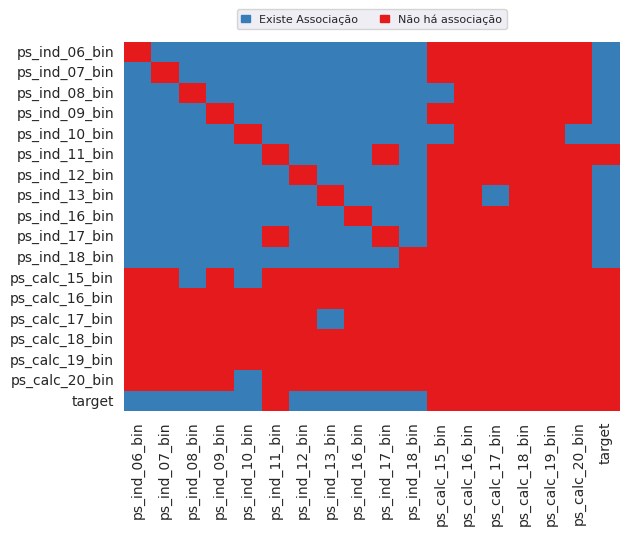

In [76]:
#Plotar o resultado do teste chi quadrado em um heat map
#Existe evidência estatística para afirmar que não existe associação entre algumas das variáveis contínuas 
#Existe evidência estatística para afirmar que não existe associação entre algumas das variáveis binárias e o output

heat_map_significance(bin_chi_quadrado,alpha=0.05)

- Variáveis binárias não associadas com o output:
    - ps_ind_10_bin
    - ps_ind_11_bin
    - ps_ind_13_bin
    - ps_calc_15_bin
    - ps_calc_16_bin
    - ps_calc_17_bin
    - ps_calc_18_bin
    - ps_calc_19_bin
    - ps_calc_19_bin
    - ps_calc_20_bin